## Problem Statement: Life Insurance Data
    
The dataset belongs to a leading life insurance company. The company wants to predict the bonus for its agents so that it may design appropriate engagement activity for their high performing agents and upskill programs for low performing agents.

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

**READ DATA**

In [2]:
insurance_df = pd.read_excel('Sales.xlsx',sheet_name='Sales')
insurance_df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


**BASIC INFO**

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [4]:
insurance_df.dtypes.value_counts()

object     8
float64    7
int64      5
dtype: int64

In [4]:
print('There are {} records and {} columns'.format(insurance_df.shape[0],insurance_df.shape[1]))
print('There are {} duplicate records'.format(insurance_df.duplicated().sum()))

There are 4520 records and 20 columns
There are 0 duplicate records


**DESCRIPTIVE STATISTICS**

In [6]:
insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


In [7]:
# 50% of AgentBonus is 3911.5, max - 9608.0
# Majority (75%) of customer age is 20 years, min is low as 2 and max is 58
# Majority (75%) of customer tenure is 20 yrs
# Around 50% of customers have monthly income as 21606.0
# Max ExistingPolicyTenure 25 yrs

In [8]:
insurance_df.select_dtypes('object').describe().T

,count,unique,top,freq
Channel,4520,3,Agent,3194
Occupation,4520,5,Salaried,2192
EducationField,4520,7,Graduate,1870
Gender,4520,3,Male,2688
Designation,4520,6,Manager,1620
MaritalStatus,4520,4,Married,2268
Zone,4520,4,West,2566
PaymentMethod,4520,4,Half Yearly,2656


**NULL VALUES CHECK**

In [5]:
print('Null value check:---------------')
null_df = pd.DataFrame({'Null_%':(insurance_df.isnull().sum()/insurance_df.index.size)*100}).sort_values('Null_%',ascending=False)
null_df

Null value check:---------------


,Null_%
Age,5.951327
MonthlyIncome,5.221239
CustTenure,5.000000
ExistingPolicyTenure,4.070796
SumAssured,3.407080
CustCareScore,1.150442
NumberOfPolicy,0.995575
Gender,0.000000
ExistingProdType,0.000000
Designation,0.000000


**OUTLIER CHECK**

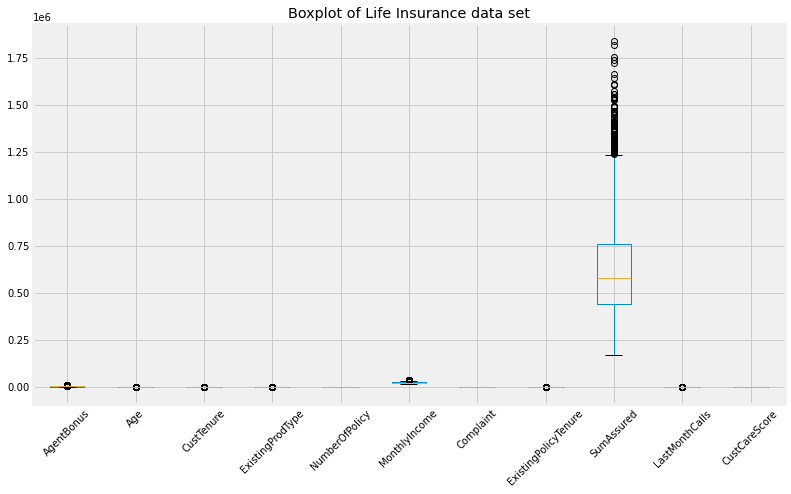

In [10]:
insurance_df.iloc[:,1:].boxplot(figsize=(12,7), rot=45);
plt.title('Boxplot of Life Insurance data set')
plt.show()

**UNIVARIATE ANALYSIS**

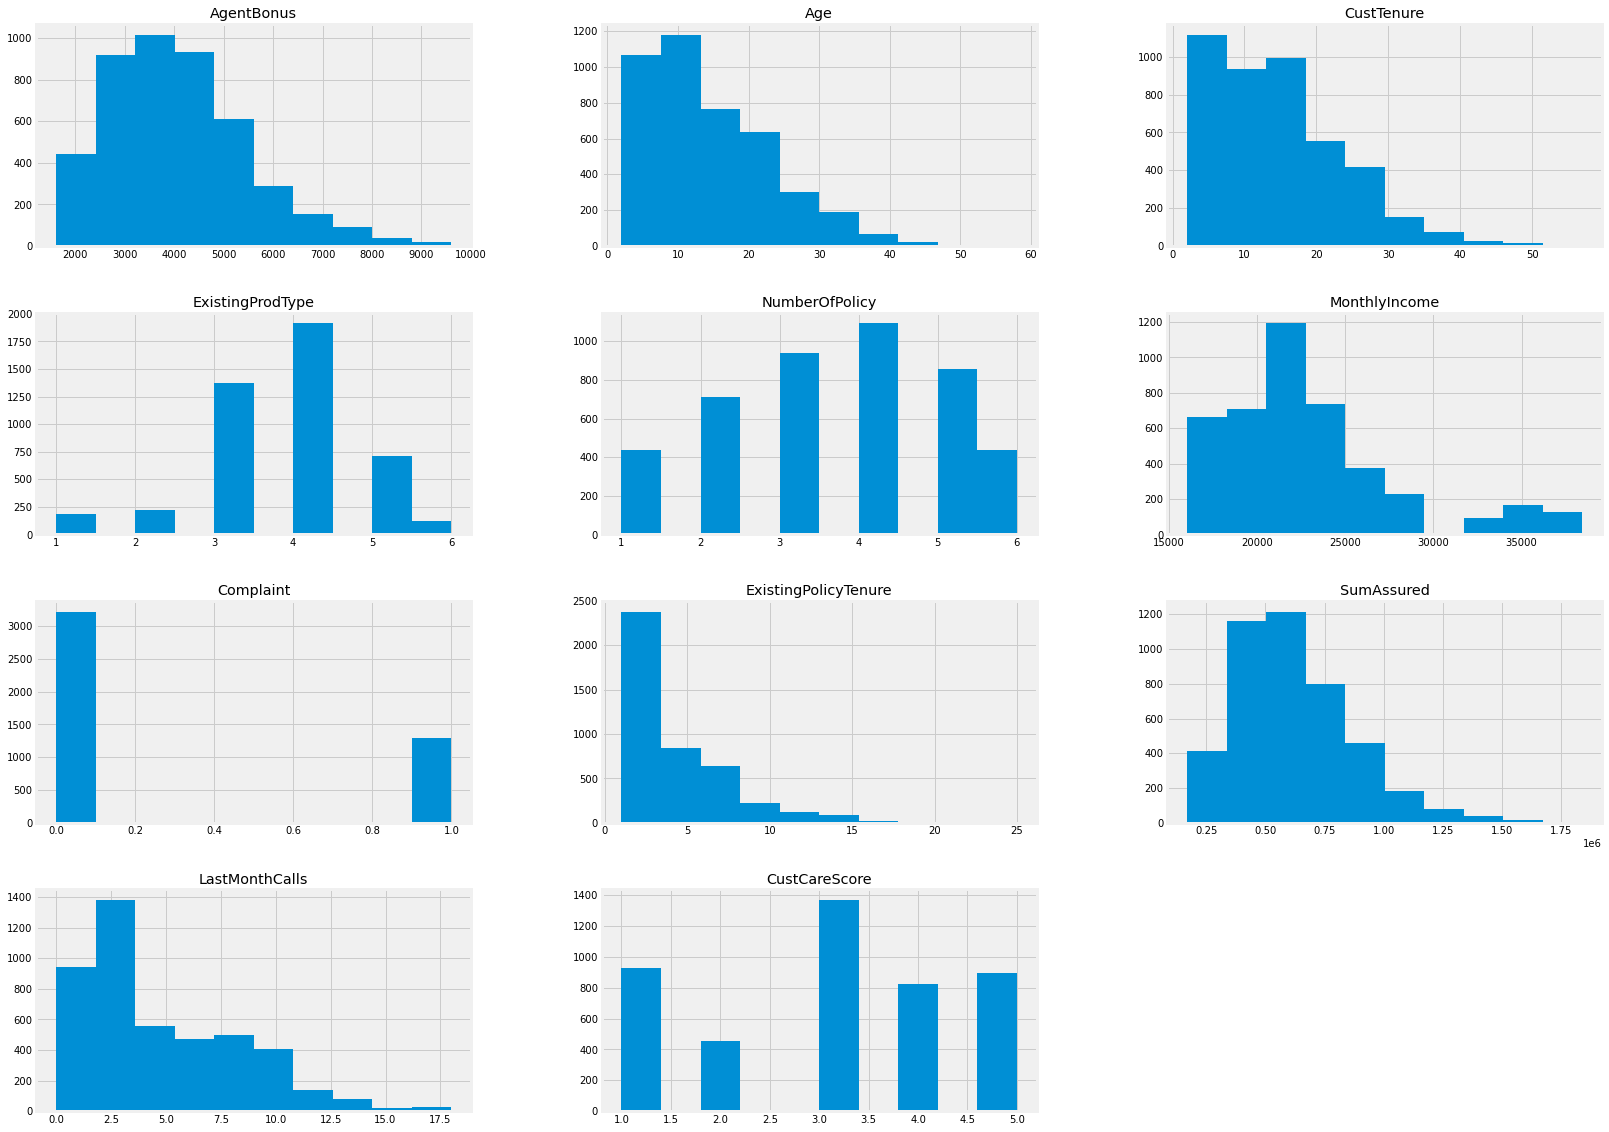

In [11]:
insurance_df.iloc[:,1:].hist(figsize=(25,20));

In [3]:
num_cols = []; obj_cols = []

for col in insurance_df.columns:
    if insurance_df[col].dtype.name != 'object':
        num_cols.append(col)
    else: 
        obj_cols.append(col)    

In [12]:
discrete_cols = ['ExistingProdType', 'ExistingPolicyTenure','NumberOfPolicy', 'Complaint', 'CustCareScore', 
                 'LastMonthCalls']

In [14]:
def univariate_analysis(df):
    
    print('**********************UNIVARIATE ANALYSIS FOR CONTINUOUS VARIABLES************************\n')
    for col in num_cols[1:]:
        if col not in discrete_cols:
            fig, axes = plt.subplots(nrows=1, ncols=2)
            fig.set_size_inches(15,5)

            print(col.upper())
            ax = sns.boxplot(df[col], ax=axes[0])
            ax.set_title('Boxplot')

            ax = sns.distplot(df[col], ax=axes[1])
            ax.set_title('Distribution plot')

            plt.show()
            print('\n--------------------------------------------------------------------------------------------------')
         
    
    print('**********************UNIVARIATE ANALYSIS FOR DISCRETE VARIABLES************************\n')
    for col in discrete_cols:
        plt.figure(figsize=(10,5))
        print(col.upper(),'\t', df[col].nunique(),'\n')
        print(df[col].value_counts())
        sns.countplot(df[col],order=df[col].value_counts().index)
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')
        
    print('\n**********************UNIVARIATE ANALYSIS FOR OBJECT VARIABLES************************\n')
    for col in obj_cols:
        plt.figure(figsize=(10,5))
        print(col.upper(),'\t', df[col].nunique(),'\n')
        print(df[col].value_counts())
        sns.countplot(df[col],order=df[col].value_counts().index)
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')

**********************UNIVARIATE ANALYSIS FOR CONTINUOUS VARIABLES************************

AGENTBONUS


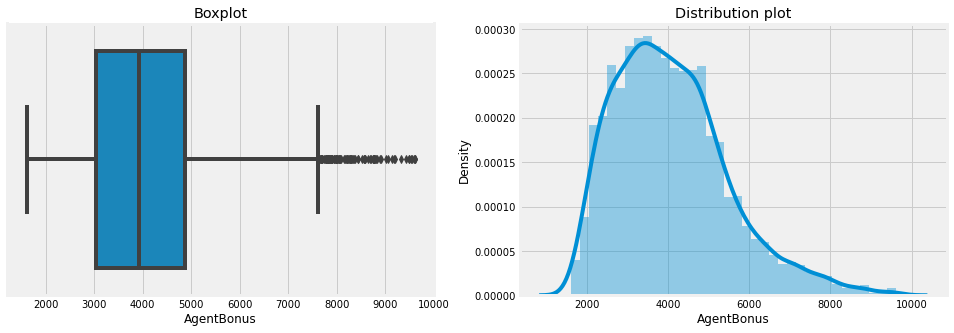


--------------------------------------------------------------------------------------------------
AGE


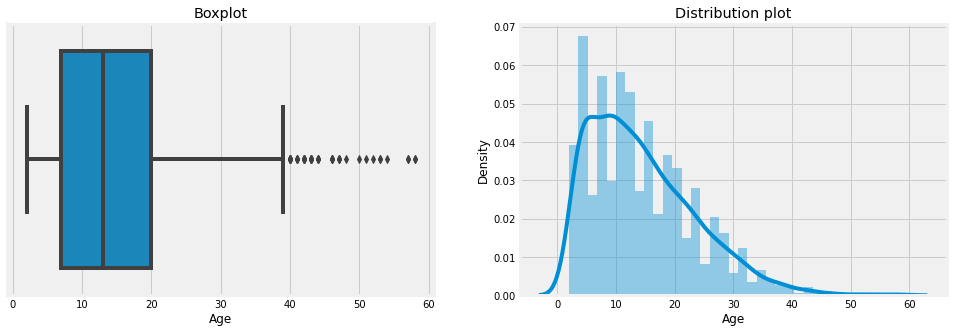


--------------------------------------------------------------------------------------------------
CUSTTENURE


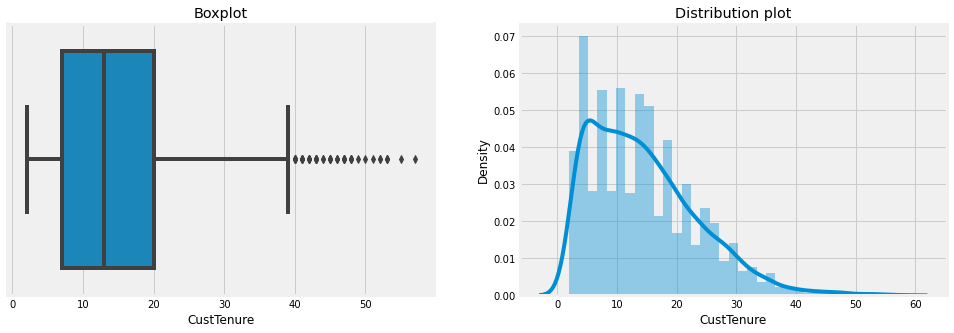


--------------------------------------------------------------------------------------------------
MONTHLYINCOME


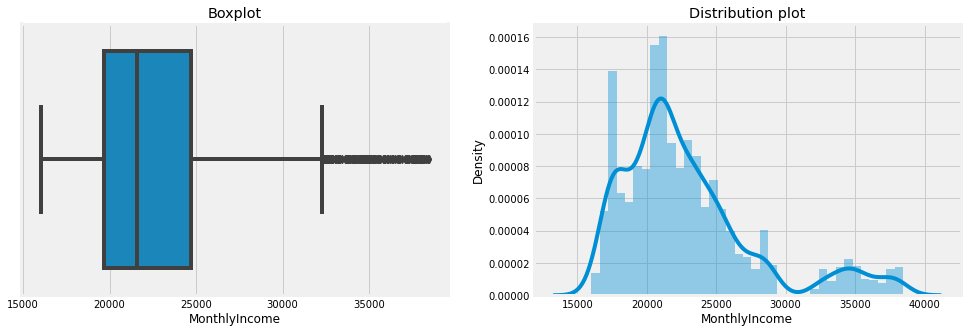


--------------------------------------------------------------------------------------------------
SUMASSURED


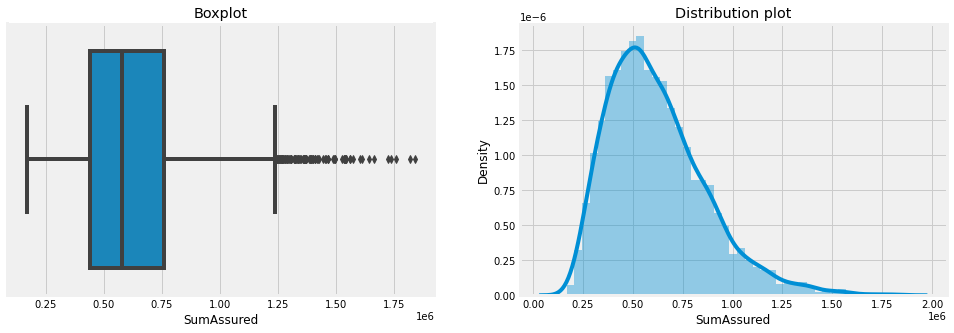


--------------------------------------------------------------------------------------------------
**********************UNIVARIATE ANALYSIS FOR DISCRETE VARIABLES************************

EXISTINGPRODTYPE 	 6 

4    1916
3    1369
5     708
2     221
1     183
6     123
Name: ExistingProdType, dtype: int64


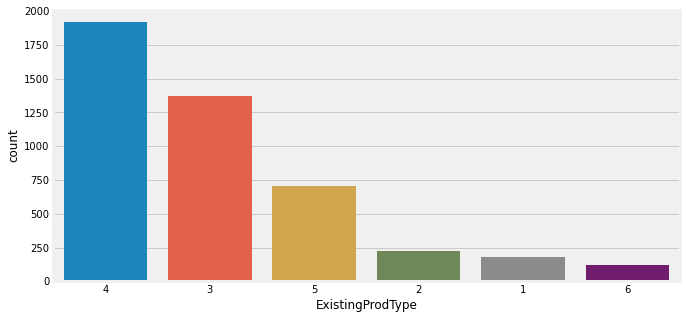


--------------------------------------------------------------------------------------------------
EXISTINGPOLICYTENURE 	 24 

1.0     990
2.0     837
3.0     554
4.0     460
5.0     381
6.0     263
7.0     194
8.0     180
9.0     132
10.0     93
11.0     65
12.0     56
13.0     39
14.0     36
16.0     20
15.0     16
17.0      6
18.0      4
20.0      3
22.0      2
19.0      2
25.0      1
23.0      1
21.0      1
Name: ExistingPolicyTenure, dtype: int64


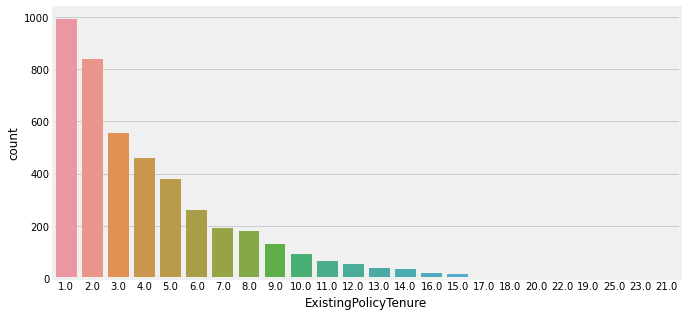


--------------------------------------------------------------------------------------------------
NUMBEROFPOLICY 	 6 

4.0    1094
3.0     939
5.0     856
2.0     711
1.0     438
6.0     437
Name: NumberOfPolicy, dtype: int64


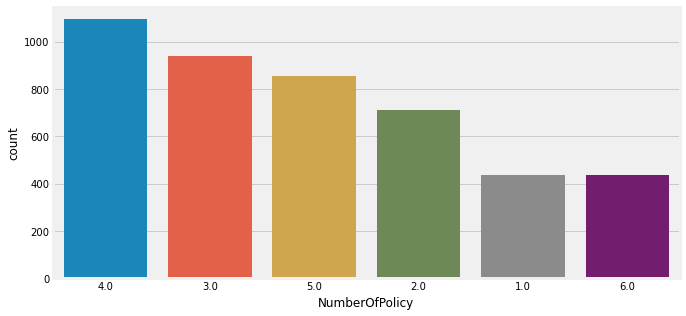


--------------------------------------------------------------------------------------------------
COMPLAINT 	 2 

0    3222
1    1298
Name: Complaint, dtype: int64


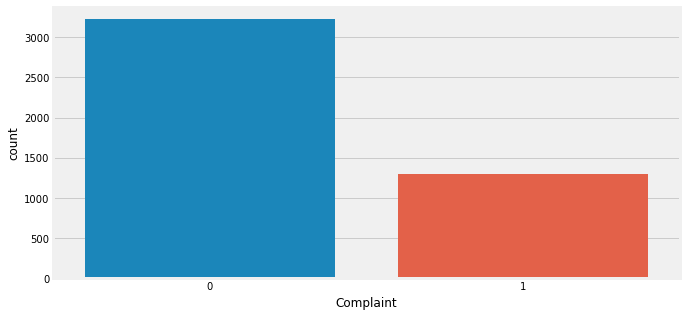


--------------------------------------------------------------------------------------------------
CUSTCARESCORE 	 5 

3.0    1367
1.0     928
5.0     893
4.0     826
2.0     454
Name: CustCareScore, dtype: int64


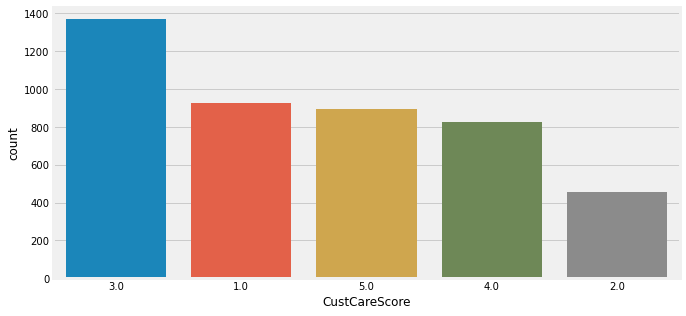


--------------------------------------------------------------------------------------------------
LASTMONTHCALLS 	 19 

3     733
2     647
1     532
8     497
0     408
7     377
4     357
9     263
5     199
10    141
6      97
11     76
12     61
13     51
14     30
17     15
15     14
18     12
16     10
Name: LastMonthCalls, dtype: int64


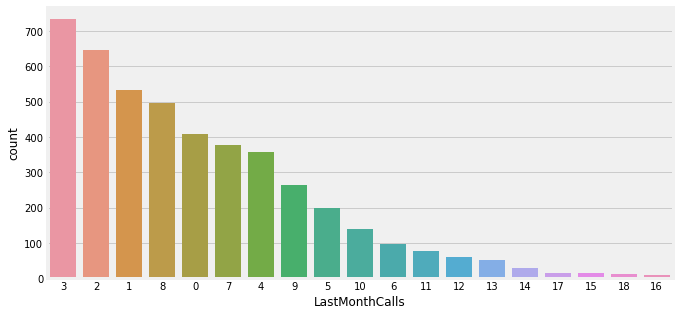


--------------------------------------------------------------------------------------------------

**********************UNIVARIATE ANALYSIS FOR OBJECT VARIABLES************************

CHANNEL 	 3 

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64


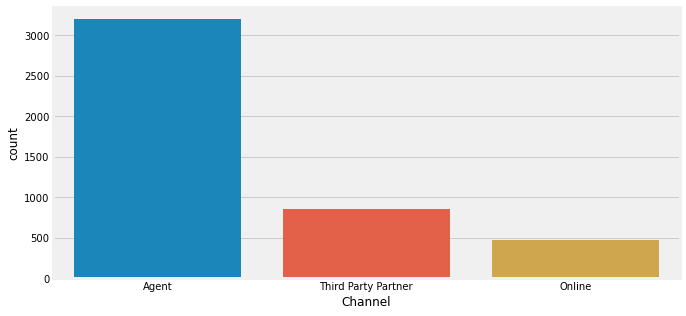


--------------------------------------------------------------------------------------------------
OCCUPATION 	 5 

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64


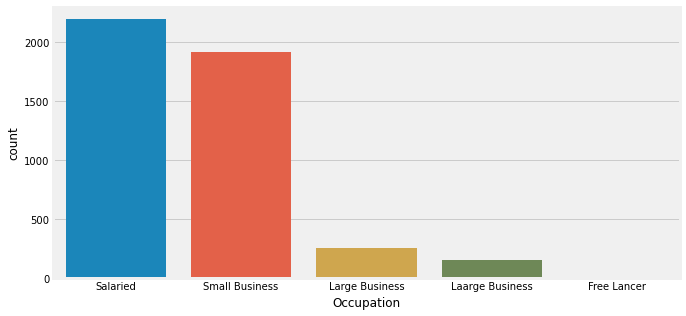


--------------------------------------------------------------------------------------------------
EDUCATIONFIELD 	 7 

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64


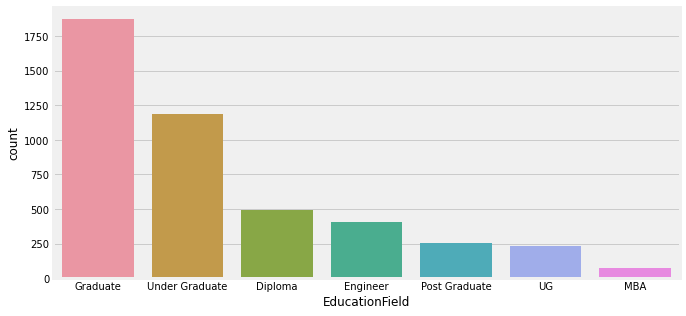


--------------------------------------------------------------------------------------------------
GENDER 	 3 

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64


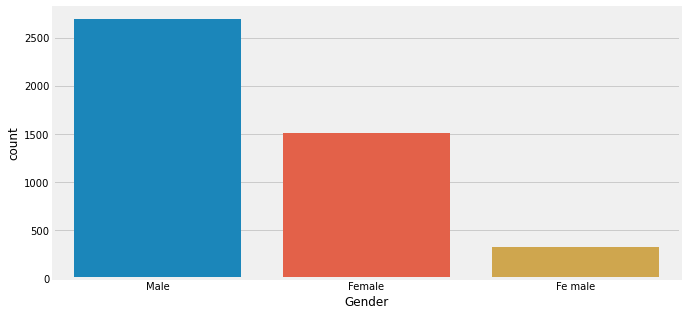


--------------------------------------------------------------------------------------------------
DESIGNATION 	 6 

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64


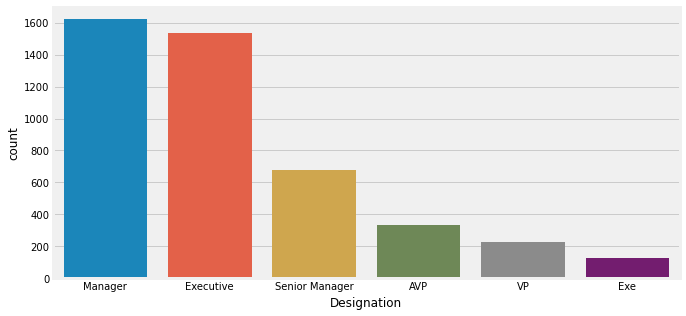


--------------------------------------------------------------------------------------------------
MARITALSTATUS 	 4 

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64


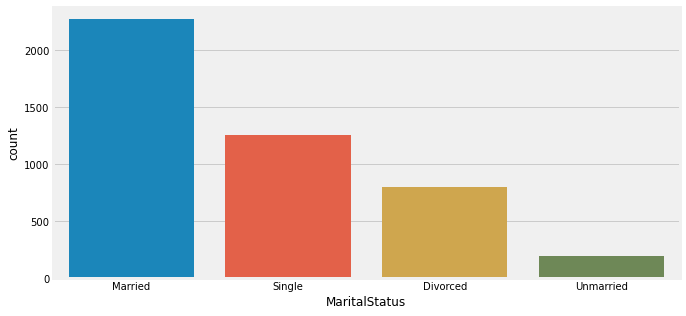


--------------------------------------------------------------------------------------------------
ZONE 	 4 

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64


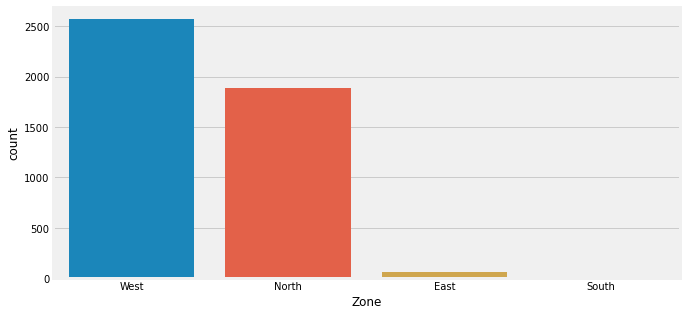


--------------------------------------------------------------------------------------------------
PAYMENTMETHOD 	 4 

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64


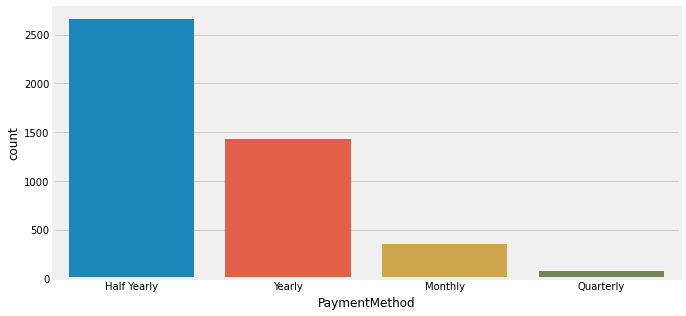


--------------------------------------------------------------------------------------------------


In [15]:
univariate_analysis(insurance_df)

In [106]:
#4, 5
826/4520, 893/4520

(0.1827433628318584, 0.19756637168141594)

**AGENTBONUS - DECLARING A THRESHOLD**

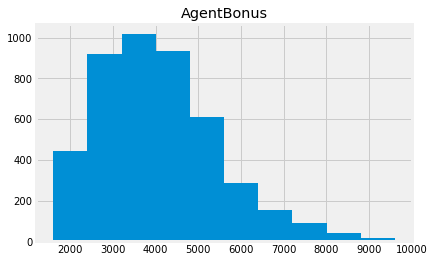

In [16]:
insurance_df.hist('AgentBonus');

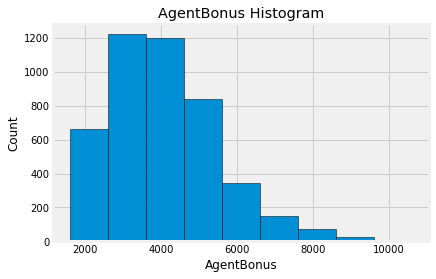

In [13]:
bins = np.arange(insurance_df.AgentBonus.min(), insurance_df.AgentBonus.max()+1000, 1000)
plt.hist(insurance_df.AgentBonus, edgecolor = 'black', bins=bins);
plt.title('AgentBonus Histogram');
plt.xlabel('AgentBonus')
plt.ylabel('Count')
plt.show();

In [14]:
bins

array([ 1605,  2605,  3605,  4605,  5605,  6605,  7605,  8605,  9605,
       10605])

In [19]:
insurance_df[insurance_df.AgentBonus >=5605].shape[0]

594

In [20]:
594/4520

0.1314159292035398

***>>> Fixing some values (like spelling & redundant words)***

In [4]:
insurance_df['Occupation'] = insurance_df['Occupation'].replace({'Laarge Business':'Large Business'})

insurance_df['EducationField'] = insurance_df['EducationField'].replace({'UG': 'Under Graduate',
                                                                         'Engineer': 'Graduate',
                                                                         'MBA': 'Post Graduate'})

insurance_df['Gender'] = insurance_df['Gender'].replace({'Fe male': 'Female'})

insurance_df['Designation'] = insurance_df['Designation'].replace({'Exe': 'Executive'})

insurance_df['MaritalStatus'] = insurance_df['MaritalStatus'].replace({'Unmarried': 'Single'})


**AGE ANALYSIS**

In [22]:
insurance_df.sort_values('Age',ascending=True).head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
1176,7001176,1898,2.0,8.0,Agent,Small Business,Under Graduate,Female,1,Executive,3.0,Married,18978.0,0,2.0,318830.0,North,Monthly,2,5.0
536,7000536,2398,2.0,14.0,Agent,Salaried,Graduate,Female,3,Executive,3.0,Divorced,17132.0,1,2.0,NaN,West,Half Yearly,1,2.0
2841,7002841,2341,2.0,9.0,Third Party Partner,Salaried,Post Graduate,Male,4,Executive,4.0,Divorced,21278.0,0,5.0,395558.0,West,Half Yearly,3,3.0
4233,7004233,2307,2.0,9.0,Agent,Small Business,Under Graduate,Male,4,Executive,4.0,Single,20976.0,0,5.0,408403.0,North,Half Yearly,10,5.0
4218,7004218,2470,2.0,10.0,Agent,Small Business,Under Graduate,Female,5,Manager,4.0,Single,24701.0,0,1.0,417447.0,North,Yearly,4,3.0


In [23]:
insurance_df.EducationField.value_counts(normalize=True)

Graduate          0.503982
Under Graduate    0.314159
Diploma           0.109735
Post Graduate     0.072124
Name: EducationField, dtype: float64

In [24]:
pd.pivot_table(data=insurance_df, index='Age', columns='EducationField',values='CustID', 
               aggfunc='count', margins=True, margins_name='Total')

EducationField,Diploma,Graduate,Post Graduate,Under Graduate,Total
Age,,,,,
2.0,11.0,32.0,4.0,27.0,74
3.0,24.0,90.0,18.0,60.0,192
4.0,23.0,119.0,15.0,63.0,220
5.0,27.0,121.0,16.0,75.0,239
6.0,21.0,87.0,12.0,57.0,177
7.0,26.0,82.0,13.0,45.0,166
8.0,24.0,106.0,19.0,73.0,222
9.0,20.0,112.0,13.0,57.0,202
10.0,19.0,111.0,15.0,62.0,207


In [25]:
insurance_df[insurance_df.Age >20]

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
13,7000013,3648,22.0,22.0,Online,Small Business,Under Graduate,Female,3,Manager,3.0,Married,20265.0,0,1.0,383009.0,West,Half Yearly,2,2.0
14,7000014,4311,26.0,17.0,Agent,Salaried,Graduate,Male,3,Manager,3.0,Divorced,21553.0,0,1.0,732802.0,West,Half Yearly,0,2.0
24,7000024,4969,30.0,25.0,Online,Salaried,Graduate,Male,4,Manager,2.0,Divorced,19876.0,0,4.0,954048.0,North,Yearly,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,7004508,4872,24.0,24.0,Agent,Salaried,Graduate,Male,4,AVP,NaN,Married,32483.0,1,NaN,648036.0,West,Half Yearly,11,5.0
4510,7004510,3441,21.0,14.0,Agent,Small Business,Under Graduate,Female,4,Manager,6.0,Single,24582.0,0,7.0,578169.0,West,Half Yearly,7,4.0
4512,7004512,5693,34.0,34.0,Agent,Small Business,Under Graduate,Female,5,Senior Manager,6.0,Married,28465.0,1,17.0,1138600.0,North,Half Yearly,10,3.0
4513,7004513,4377,26.0,18.0,Agent,Salaried,Graduate,Male,4,Executive,5.0,Married,20844.0,0,7.0,827298.0,West,Monthly,4,1.0


***>>> Imputing Erratic values***

In [5]:
insurance_df1 = insurance_df.copy()

In [6]:
insurance_df1['Age'] = np.where(((insurance_df1['Age']<18) & (insurance_df1['EducationField'] == 'Under Graduate')),
                                random.randint(18,21),
                                insurance_df1['Age'])

insurance_df1['Age'] = np.where(((insurance_df1['Age']<22) & ((insurance_df1['EducationField'] == 'Graduate'))),
                                random.randint(22,25),
                                insurance_df1['Age'])

insurance_df1['Age'] = np.where(((insurance_df1['Age']<21) & ((insurance_df1['EducationField'] == 'Post Graduate'))),
                                random.randint(20,28),
                                insurance_df1['Age'])

insurance_df1['Age'] = np.where(((insurance_df1['Age']<15) & ((insurance_df1['EducationField'] == 'Diploma'))),
                                random.randint(14,19),
                                insurance_df1['Age'])

In [104]:
2887/4520

0.638716814159292

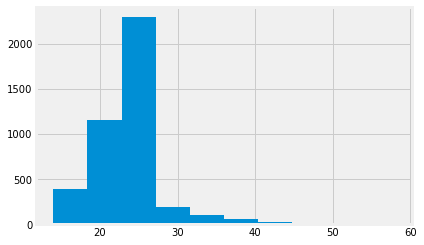

In [7]:
insurance_df1['Age'].hist();

**BIVARIATE ANALYSIS**

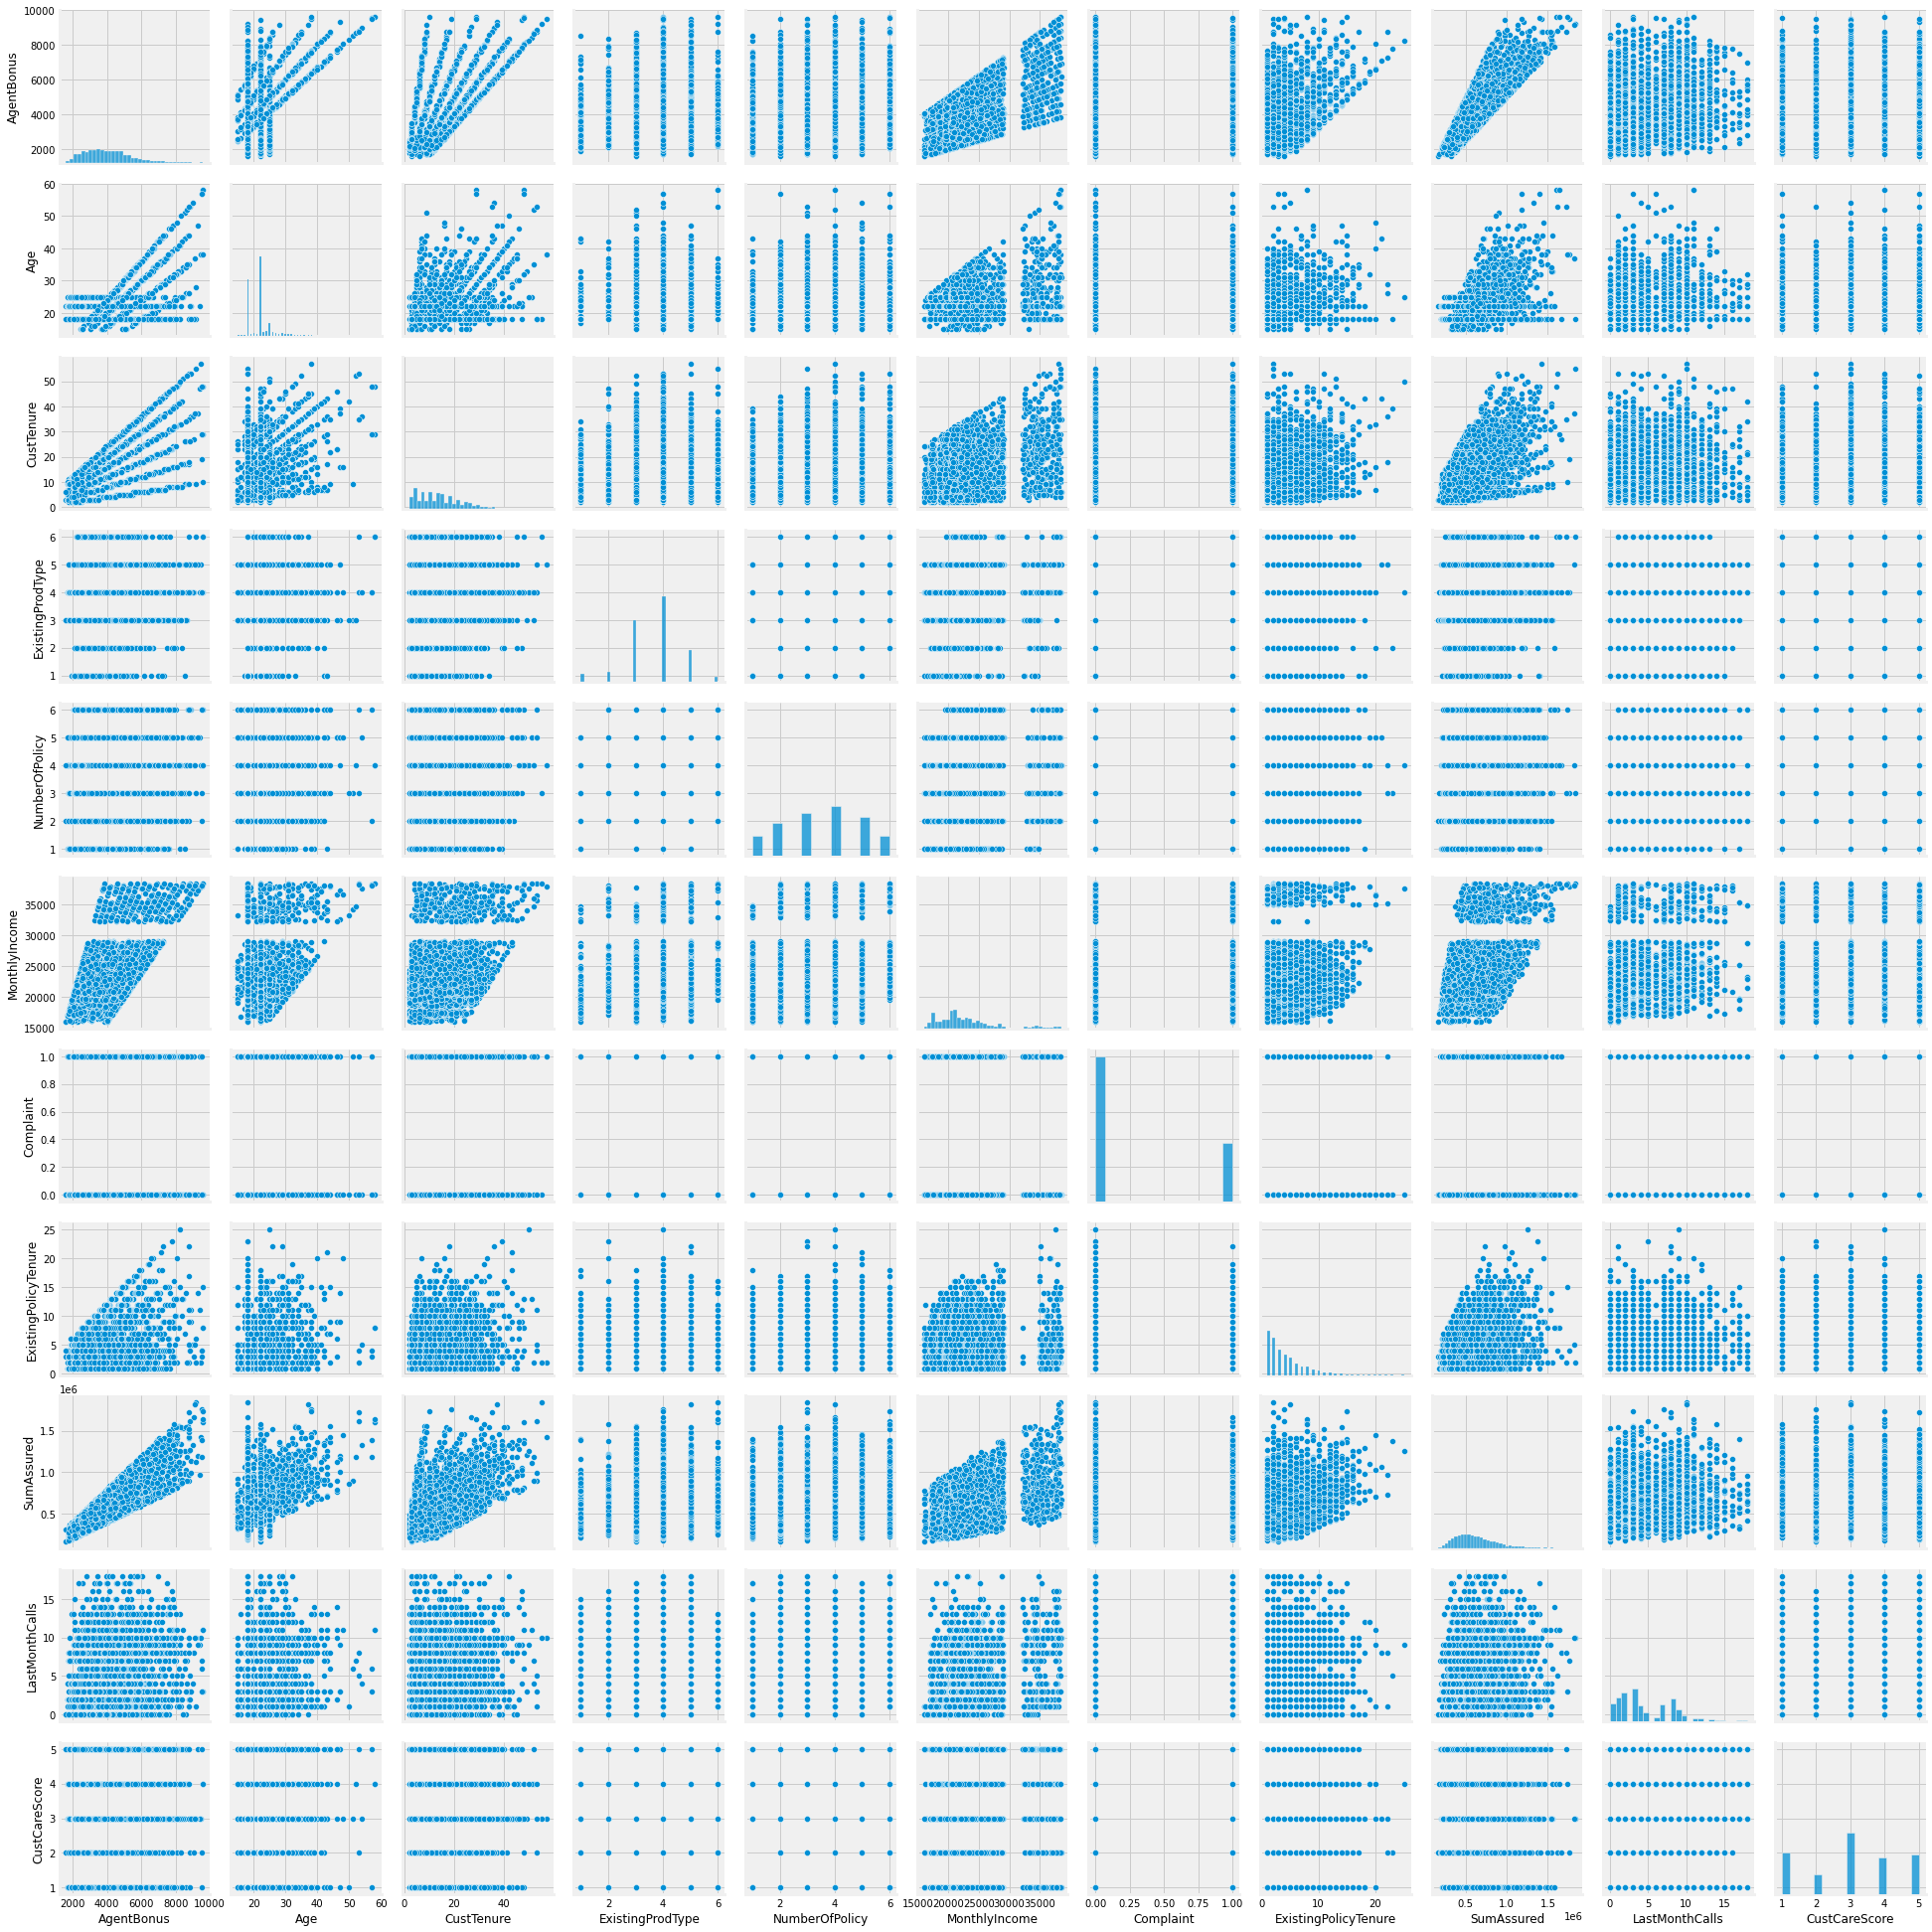

In [30]:
sns.pairplot(insurance_df1.drop('CustID',axis=1));

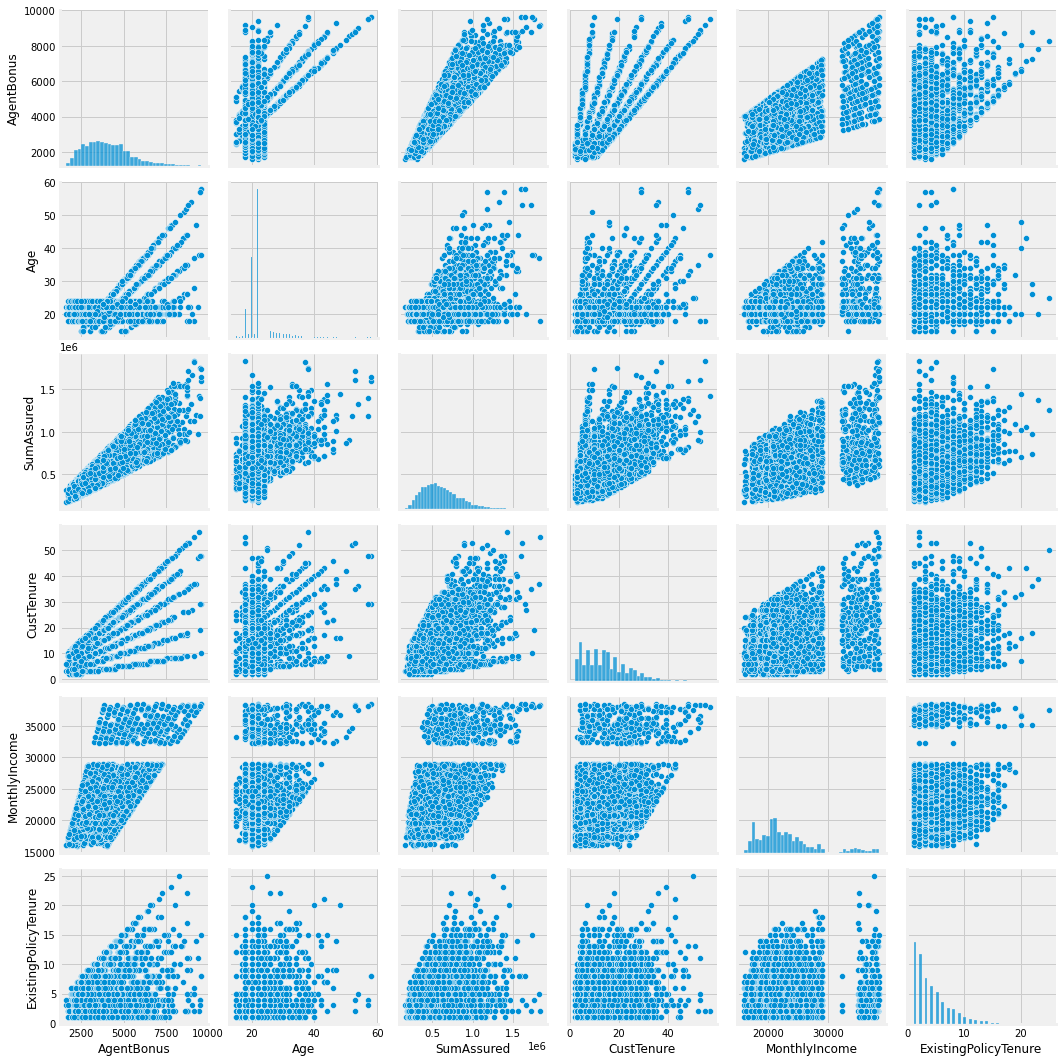

In [7]:
pair_cols = ['AgentBonus','Age','SumAssured','CustTenure','MonthlyIncome','ExistingPolicyTenure']
sns.pairplot(insurance_df1[pair_cols]);

In [31]:
def bivariate_analysis(df):
    print('\n**********************AGENT BONUS WITH NUMERIC VARIABLES************************\n')
    for col in num_cols[2:]:
        print('AGENTBONUS VS.', col.upper())
        sns.scatterplot(x = df['AgentBonus'], y = df[col]);
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')
        
    print('\n**********************AGENT BONUS WITH OBJECT VARIABLES************************\n')
    for col in obj_cols:
        plt.figure(figsize=(10,5))
        print('AGENTBONUS VS.', col.upper())
        sns.boxplot(x = df[col], y = df['AgentBonus']);
        plt.show()
        print('\n--------------------------------------------------------------------------------------------------')   


**********************AGENT BONUS WITH NUMERIC VARIABLES************************

AGENTBONUS VS. AGE


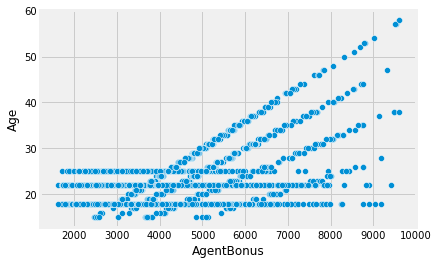


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. CUSTTENURE


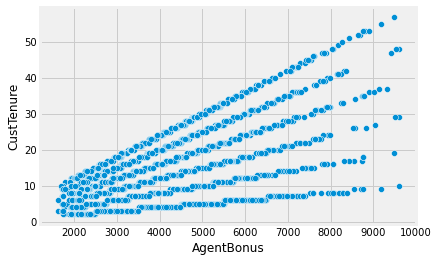


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EXISTINGPRODTYPE


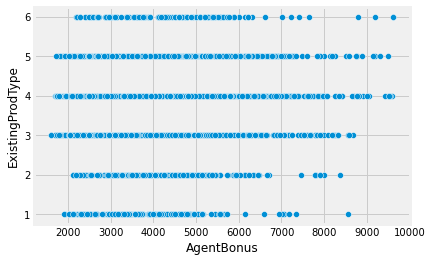


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. NUMBEROFPOLICY


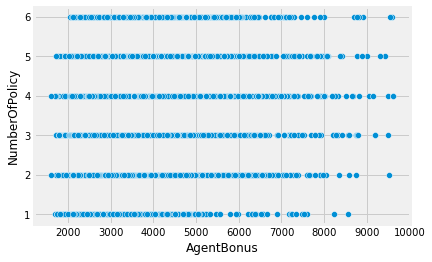


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. MONTHLYINCOME


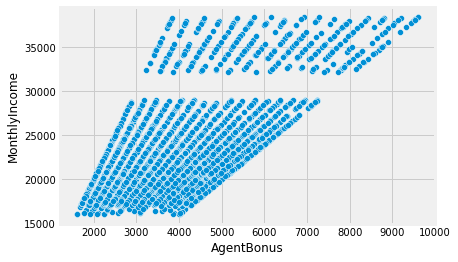


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. COMPLAINT


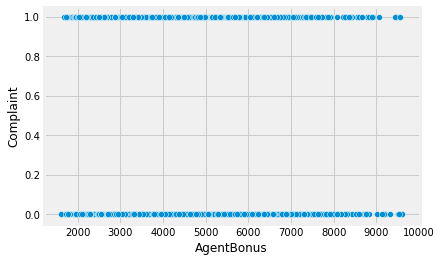


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EXISTINGPOLICYTENURE


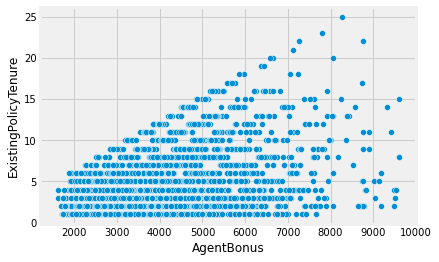


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. SUMASSURED


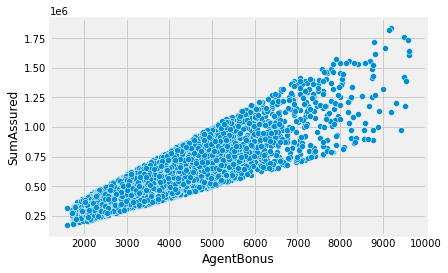


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. LASTMONTHCALLS


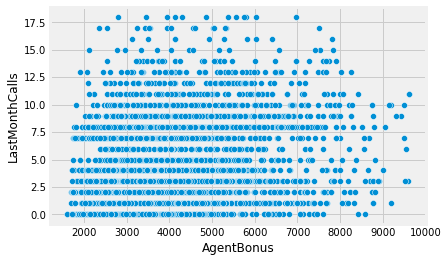


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. CUSTCARESCORE


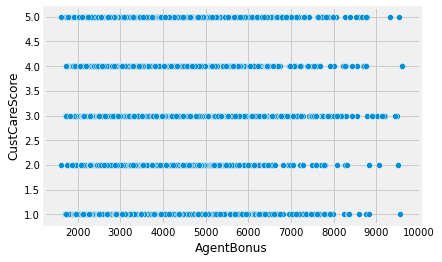


--------------------------------------------------------------------------------------------------

**********************AGENT BONUS WITH OBJECT VARIABLES************************

AGENTBONUS VS. CHANNEL


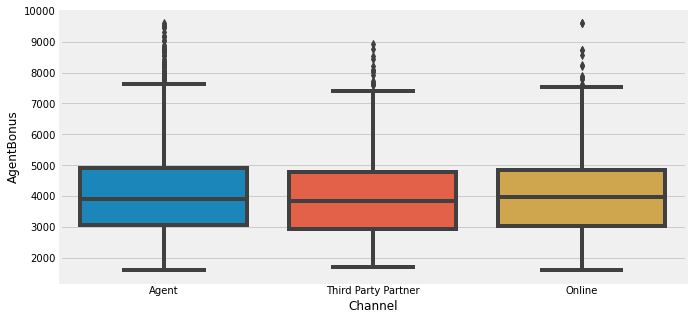


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. OCCUPATION


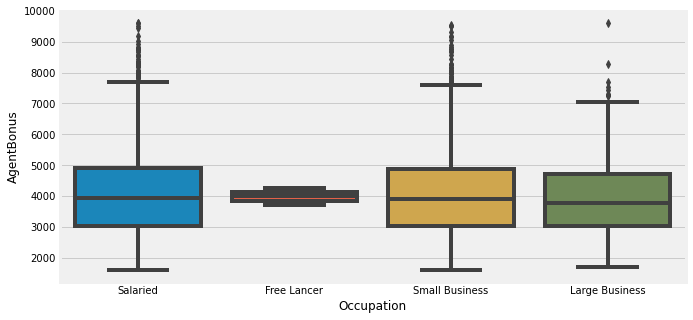


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. EDUCATIONFIELD


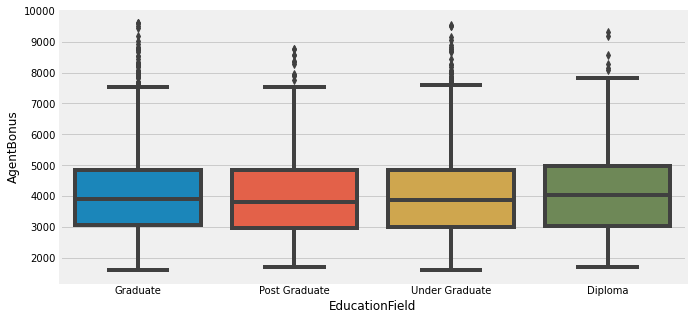


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. GENDER


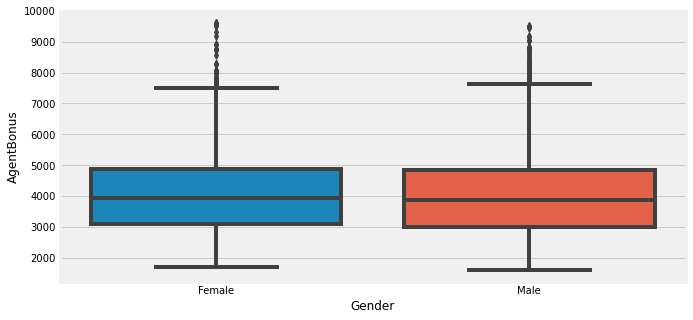


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. DESIGNATION


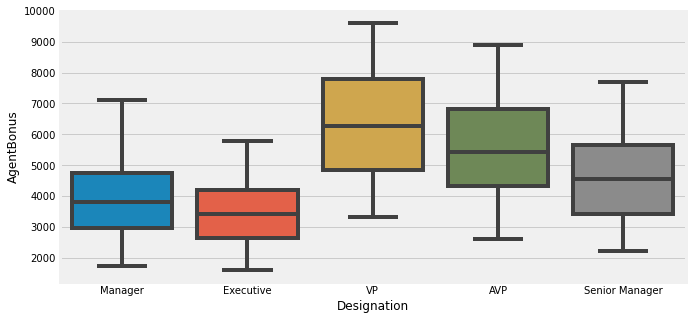


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. MARITALSTATUS


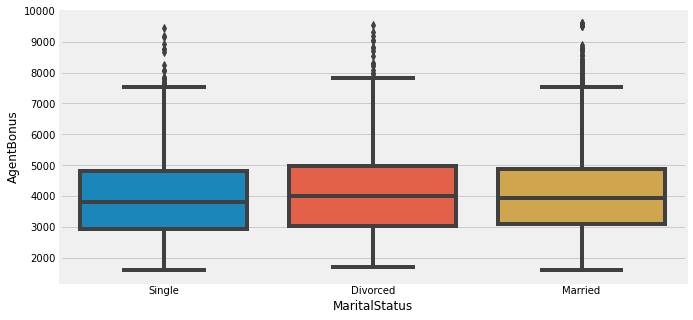


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. ZONE


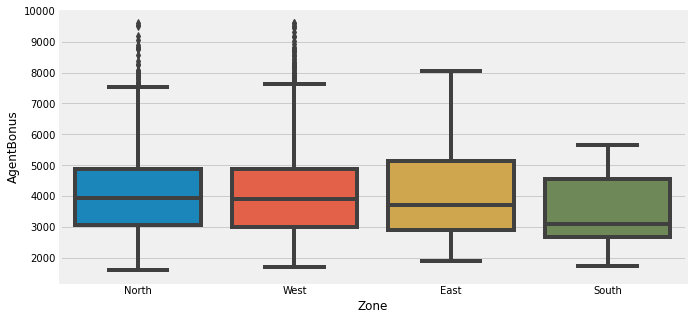


--------------------------------------------------------------------------------------------------
AGENTBONUS VS. PAYMENTMETHOD


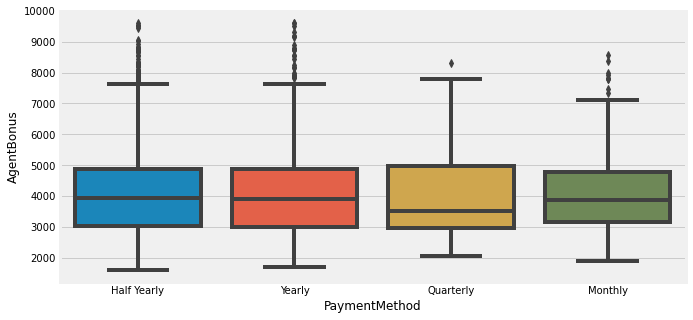


--------------------------------------------------------------------------------------------------


In [32]:
bivariate_analysis(insurance_df1)

**>> Dropping CustID**

In [8]:
insurance_df1.drop(['CustID'], axis=1, inplace=True)

**ENCODING STRING VALUES**

In [9]:
insurance_df1[obj_cols].head(3)

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,PaymentMethod
0,Agent,Salaried,Graduate,Female,Manager,Single,North,Half Yearly
1,Third Party Partner,Salaried,Graduate,Male,Manager,Divorced,North,Yearly
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North,Yearly


***>>> Ordinal Varaibles***

In [10]:
ordinal_cols = ['EducationField', 'Designation', 'Occupation']

education_mapping = {'Diploma': 0, 'Under Graduate': 1,'Graduate': 2, 'Post Graduate': 3}
designation_mapping = {'Executive': 0, 'Manager': 1, 'Senior Manager': 2, 'AVP': 3, 'VP': 4}
occupation_mapping = {'Free Lancer':0, 'Salaried':1, 'Small Business': 2,'Large Business':3}

mappings = [education_mapping, designation_mapping, occupation_mapping]

for col, mapping in zip(ordinal_cols, mappings):
    insurance_df1[col] = insurance_df1[col].replace(mapping)
    
insurance_df1[['EducationField', 'Designation','Occupation']].head(3)    

,EducationField,Designation,Occupation
0,2,1,1
1,2,1,1
2,3,0,0


In [11]:
insurance_df1.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,1,2,Female,3,1,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,2214,23.0,2.0,Third Party Partner,1,2,Male,4,1,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,4273,26.0,4.0,Agent,0,3,Male,4,0,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,1791,23.0,NaN,Third Party Partner,1,2,Female,3,0,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,2955,21.0,NaN,Agent,2,1,Male,3,0,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


***>>> Nominal Variables*** 

In [12]:
nominal_cols = ['Channel','Gender','MaritalStatus','Zone','PaymentMethod']

insurance_df1 = pd.get_dummies(data=insurance_df1, columns=nominal_cols, drop_first=True)
insurance_df1.head()

,AgentBonus,Age,CustTenure,Occupation,EducationField,ExistingProdType,Designation,NumberOfPolicy,MonthlyIncome,Complaint,...,Channel_Third Party Partner,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,4409,22.0,4.0,1,2,3,1,2.0,20993.0,1,...,0,0,0,1,1,0,0,0,0,0
1,2214,23.0,2.0,1,2,4,1,4.0,20130.0,0,...,1,1,0,0,1,0,0,0,0,1
2,4273,26.0,4.0,0,3,4,0,3.0,17090.0,1,...,0,1,0,1,1,0,0,0,0,1
3,1791,23.0,NaN,1,2,3,0,3.0,17909.0,1,...,1,0,0,0,0,0,1,0,0,0
4,2955,21.0,NaN,2,1,3,0,4.0,18468.0,0,...,0,1,0,0,0,0,1,0,0,0


**MISSING VALUES TREATMENT**

In [99]:
null_df.head(7)

,Null_%
Age,5.951327
MonthlyIncome,5.221239
CustTenure,5.000000
ExistingPolicyTenure,4.070796
SumAssured,3.407080
CustCareScore,1.150442
NumberOfPolicy,0.995575


***>>> Treating Age null values***

In [39]:
#'Diploma': 0, 'Under Graduate': 1,'Graduate': 2, 'Post Graduate': 3

In [13]:
diploma_median = insurance_df1[insurance_df1.EducationField == 0]['Age'].median()
ug_median = insurance_df1[insurance_df1.EducationField == 1]['Age'].median()
grad_median = insurance_df1[insurance_df1.EducationField == 2]['Age'].median()
pg_median = insurance_df1[insurance_df1.EducationField == 3]['Age'].median()

In [15]:
diploma_age_missing = ((insurance_df1.Age.isnull() == True) &
                        (insurance_df1.EducationField == 0))

ug_age_missing = ((insurance_df1.Age.isnull() == True) &
                    (insurance_df1.EducationField == 1))

grad_age_missing = ((insurance_df1.Age.isnull() == True) &
                    (insurance_df1.EducationField == 2))

pg_age_missing = ((insurance_df1.Age.isnull() == True) &
                    (insurance_df1.EducationField == 3))

In [16]:
insurance_df1.Age.isnull().sum()

269

In [17]:
for row in (np.where(diploma_age_missing)):
    insurance_df1.iloc[row,1] = diploma_median

for row in (np.where(ug_age_missing)):
    insurance_df1.iloc[row,1] = ug_median
    
for row in (np.where(grad_age_missing)):
    insurance_df1.iloc[row,1] = grad_median
    
for row in (np.where(pg_age_missing)):
    insurance_df1.iloc[row,1] = pg_median

insurance_df1.Age.isnull().sum()

0

***>>> Treating other discrete columns nulls***

In [18]:
insurance_df1['CustCareScore'] = insurance_df1['CustCareScore'].fillna(insurance_df1['CustCareScore'].mode()[0])
insurance_df1['NumberOfPolicy'] = insurance_df1['NumberOfPolicy'].fillna(insurance_df1['NumberOfPolicy'].mode()[0])
insurance_df1['CustTenure'] = insurance_df1['CustTenure'].fillna(insurance_df1['CustTenure'].mode()[0])
insurance_df1['ExistingPolicyTenure'] = insurance_df1['ExistingPolicyTenure'].fillna(insurance_df1['ExistingPolicyTenure'].mode()[0])

In [19]:
insurance_df1.isnull().sum()

AgentBonus                       0
Age                              0
CustTenure                       0
Occupation                       0
EducationField                   0
ExistingProdType                 0
Designation                      0
NumberOfPolicy                   0
MonthlyIncome                  236
Complaint                        0
ExistingPolicyTenure             0
SumAssured                     154
LastMonthCalls                   0
CustCareScore                    0
Channel_Online                   0
Channel_Third Party Partner      0
Gender_Male                      0
MaritalStatus_Married            0
MaritalStatus_Single             0
Zone_North                       0
Zone_South                       0
Zone_West                        0
PaymentMethod_Monthly            0
PaymentMethod_Quarterly          0
PaymentMethod_Yearly             0
dtype: int64

***>>> Treating Continous column nulls***

In [20]:
knn_imputer = KNNImputer(n_neighbors=10)

insurance_df1 = pd.DataFrame(knn_imputer.fit_transform(insurance_df1), columns=insurance_df1.columns)
insurance_df1.isnull().sum().sum()

0

In [21]:
insurance_df1.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Occupation', 'EducationField',
       'ExistingProdType', 'Designation', 'NumberOfPolicy', 'MonthlyIncome',
       'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore', 'Channel_Online', 'Channel_Third Party Partner',
       'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'Zone_North', 'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

In [22]:
insurance_df1.columns = insurance_df1.columns.str.replace(' ','_')
insurance_df1.columns

Index(['AgentBonus', 'Age', 'CustTenure', 'Occupation', 'EducationField',
       'ExistingProdType', 'Designation', 'NumberOfPolicy', 'MonthlyIncome',
       'Complaint', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls',
       'CustCareScore', 'Channel_Online', 'Channel_Third_Party_Partner',
       'Gender_Male', 'MaritalStatus_Married', 'MaritalStatus_Single',
       'Zone_North', 'Zone_South', 'Zone_West', 'PaymentMethod_Monthly',
       'PaymentMethod_Quarterly', 'PaymentMethod_Yearly'],
      dtype='object')

**OUTLIER TREATMENT**

Outlier treatmemt can be done as below if needed:

Replace very low values with the 25th quantile and very high values with the 75th quantile

In [23]:
# Checking how many outliers
Q1, Q3 = insurance_df1.quantile(0.25), insurance_df1.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - (1.5*IQR)
upper = Q3 + (1.5*IQR)

In [110]:
outliers_df = pd.DataFrame({'Outliers_%':((insurance_df1<lower) | (insurance_df1>upper)).sum()/insurance_df1.index.size*100}).sort_values('Outliers_%',ascending=False)
outliers_df

,Outliers_%
Channel_Third_Party_Partner,18.982301
Age,11.238938
Channel_Online,10.353982
MonthlyIncome,8.384956
PaymentMethod_Monthly,7.831858
ExistingProdType,6.769912
ExistingPolicyTenure,4.137168
AgentBonus,2.212389
SumAssured,2.212389
PaymentMethod_Quarterly,1.681416


In [24]:
def treat_outliers(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25,75])
    IQR = Q3-Q1
    lower = Q1 - (1.5*IQR)
    upper= Q3 + (1.5*IQR)
    return lower, upper

In [25]:
cols = ['MonthlyIncome', 'SumAssured']

In [26]:
for column in cols:
    lr,ur=treat_outliers(insurance_df1[column])
    insurance_df1[column]=np.where(insurance_df1[column]>ur,ur,insurance_df1[column])
    insurance_df1[column]=np.where(insurance_df1[column]<lr,lr,insurance_df1[column])

**HEATMAP**

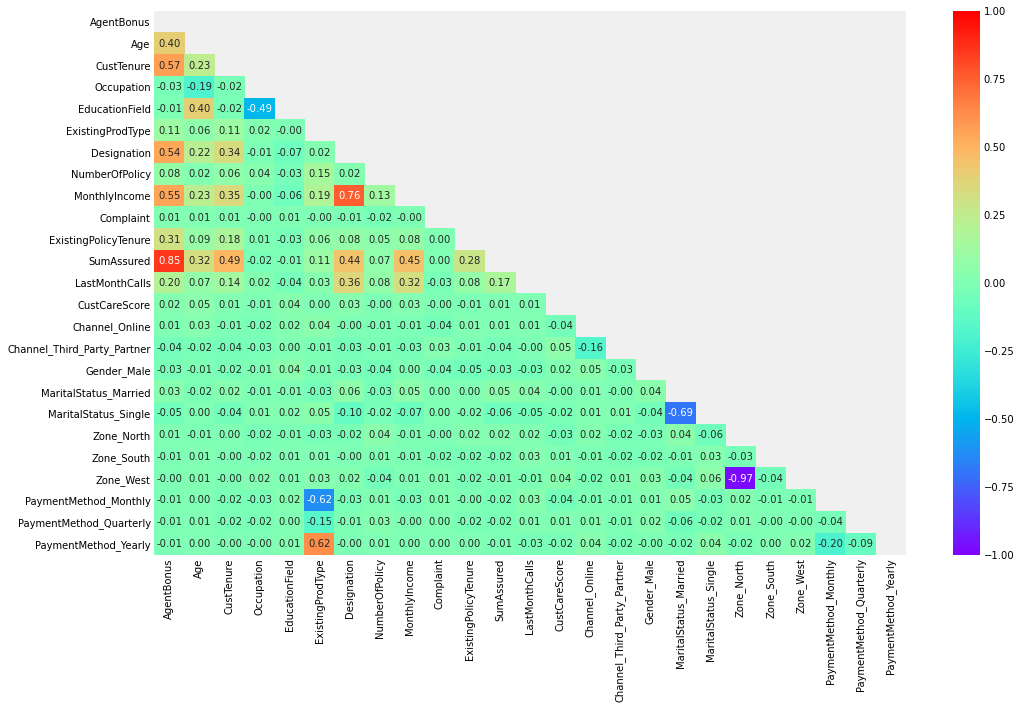

In [114]:
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(insurance_df1.corr(method='pearson')))
sns.heatmap(insurance_df1.corr(), mask=mask, fmt = '.2f', annot=True, vmin=-1, vmax=1, cmap='rainbow');

**MULTICOLLINEARITY CHECK**

In [115]:
vif_df = pd.DataFrame()
X_Data = insurance_df1.drop('AgentBonus',axis=1)
vif_df['Variable'] = X_Data.columns
vif_df['VIF'] = [variance_inflation_factor(X_Data.values, i) for i in range(X_Data.shape[1])]
vif_df = vif_df.sort_values('VIF',ascending=False).reset_index().drop('index',axis=1)
vif_df[vif_df.VIF>5]

,Variable,VIF
0,MonthlyIncome,78.214489
1,ExistingProdType,54.504974
2,Age,34.206577
3,Zone_West,25.295610
4,Zone_North,18.681483
5,SumAssured,13.211883
6,Occupation,8.570829
7,NumberOfPolicy,7.744823
8,EducationField,7.475539
9,CustCareScore,5.938059


**DATA SPLIT**

In [27]:
X = insurance_df1.drop(['AgentBonus'],axis=1)
y = insurance_df1['AgentBonus']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(3164, 1356, 3164, 1356)

**SCALING PREDICTORS**

In [30]:
sc = StandardScaler()

X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [120]:
X_train_scaled.head()

,Age,CustTenure,Occupation,EducationField,ExistingProdType,Designation,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,...,Channel_Third_Party_Partner,Gender_Male,MaritalStatus_Married,MaritalStatus_Single,Zone_North,Zone_South,Zone_West,PaymentMethod_Monthly,PaymentMethod_Quarterly,PaymentMethod_Yearly
0,3.307273,0.659388,-0.917572,0.571621,0.294954,1.688625,-1.100113,2.308046,-0.634415,-0.898020,...,-0.483248,-1.215599,-1.0,1.439390,-0.848272,-0.035578,0.875563,-0.289712,-0.130523,-0.682768
1,-0.532961,2.210956,0.614459,-0.710171,0.294954,-0.080224,1.681711,0.094655,1.576256,0.889545,...,-0.483248,-1.215599,-1.0,1.439390,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,-0.682768
2,0.320424,1.213520,-0.917572,0.571621,1.281459,-0.964649,-1.100113,-0.350470,-0.634415,-0.600092,...,2.069332,-1.215599,-1.0,1.439390,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,1.464626
3,0.320424,0.105257,0.614459,-0.710171,0.294954,0.804200,0.986255,1.131159,-0.634415,-0.600092,...,-0.483248,0.822639,1.0,-0.694739,1.178867,-0.035578,-1.142122,-0.289712,-0.130523,-0.682768
4,0.320424,-1.113832,2.146489,0.571621,-0.691551,-0.964649,-0.404657,-0.980534,1.576256,-0.898020,...,-0.483248,-1.215599,1.0,-0.694739,-0.848272,-0.035578,0.875563,-0.289712,-0.130523,-0.682768


#### BASIC MODEL BUILDING

***>>> Linear Regression***

**Fitting the model**

In [32]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

**Predictions**

In [34]:
y_pred_train = lr_model.predict(X_train_scaled)
y_pred_test = lr_model.predict(X_test_scaled)

**PERFORMANCE METRICS**

In [35]:
print("Accuracy for train set \t",lr_model.score(X_train_scaled, y_train))
print("Accuracy for test set \t",lr_model.score(X_test_scaled, y_test))

Accuracy for train set 	 0.8110685602993675
Accuracy for test set 	 0.8110996007577113


In [36]:
print("RMSE for train set \t",np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("RMSE for test set \t",np.sqrt(mean_squared_error(y_test,y_pred_test)))

RMSE for train set 	 606.2669381590388
RMSE for test set 	 618.1710361444419


In [43]:
r2_score_train = r2_score(y_train,y_pred_train)
r2_score_test = r2_score(y_test,y_pred_test)

n1,n2 = X_train.shape[0],X_test.shape[0]
k1,k2 = X_train.shape[1],X_test.shape[1]

adj_r2_train = 1 - (((1-r2_score_train)*(n1-1))/(n1-k1-1))
adj_r2_test = 1 - (((1-r2_score_test)*(n2-1))/(n2-k2-1))

print("R-Squared for train set \t\t", r2_score_train)
print("R-Squared for test set \t\t\t",r2_score_test)


print("\nAdjusted R-Squared for train set \t", adj_r2_train)
print("Adjusted R-Squared for test set \t",adj_r2_test)

print("\nMAE for train set \t\t\t", mean_absolute_error(y_train,y_pred_train))
print("MAE for test set \t\t\t",mean_absolute_error(y_test,y_pred_test))

R-Squared for train set 		 0.8110685602993675
R-Squared for test set 			 0.8110996007577113

Adjusted R-Squared for train set 	 0.8096240383010191
Adjusted R-Squared for test set 	 0.8076934327773845

MAE for train set 			 484.0826044286609
MAE for test set 			 489.02704911282456


In [7]:
import numpy as np
np.round(0.8076934327773845*100,2)

80.77

***>>> Feature Selection based on RFE***

In [44]:
best_predictors = []

def find_best_Adj_R2(predictors, regressor):
    
    print('NO. OF PREDICTORS:\t',len(predictors))
    
    X_train_1 = X_train[predictors]
    X_test_1 = X_test[predictors]

    reg_model_1 = regressor.fit(X_train_1,y_train)
    y_pred_train_1 = reg_model_1.predict(X_train_1)
    y_pred_test_1 = reg_model_1.predict(X_test_1)

    print("\nAccuracy for train set \t\t\t",reg_model_1.score(X_train_1, y_train))
    print("Accuracy for test set \t\t\t",reg_model_1.score(X_test_1, y_test))

    print("\nRMSE for train set \t\t\t",np.sqrt(mean_squared_error(y_train,y_pred_train_1)))
    print("RMSE for test set \t\t\t",np.sqrt(mean_squared_error(y_test,y_pred_test_1)))

    r2_score_train_1 = r2_score(y_train,y_pred_train_1)
    r2_score_test_1 = r2_score(y_test,y_pred_test_1)

    n1,n2 = X_train_1.shape[0],X_test_1.shape[0]
    k1,k2 = X_train_1.shape[1],X_test_1.shape[1]

    adj_r2_train_1 = 1 - (((1-r2_score_train_1)*(n1-1))/(n1-k1-1))
    adj_r2_test_1 = 1 - (((1-r2_score_test_1)*(n2-1))/(n2-k2-1))

    print("\nAdjusted R-Squared for train set \t", adj_r2_train_1)
    print("Adjusted R-Squared for test set \t",adj_r2_test_1)
    
    best_predictors.append({'No_#':len(predictors),
                            'Predictors':predictors,
                            'Acc_Train':reg_model_1.score(X_train_1, y_train),
                            'Acc_Test':reg_model_1.score(X_test_1, y_test),
                            'RMSE_Train': np.sqrt(mean_squared_error(y_train,y_pred_train_1)),
                            'RMSE_Test':np.sqrt(mean_squared_error(y_test,y_pred_test_1)),
                            'Adj_R2_Train': adj_r2_train_1,
                            'Adj_R2_Test': adj_r2_test_1
                           })
    
    print('\n------------------------------------------------------------------------------------------------------------')
    

In [45]:
for i in range(5,20):
    rfe_1 = RFE(estimator=LinearRegression(), n_features_to_select=i, step=1)
    rfe_1.fit(X_train_scaled,y_train)
    predictors = X.columns[rfe_1.get_support()].values
    find_best_Adj_R2(predictors, LinearRegression())

NO. OF PREDICTORS:	 5

Accuracy for train set 			 0.8010073203065555
Accuracy for test set 			 0.8020969570360724

RMSE for train set 			 622.2004465855052
RMSE for test set 			 632.7300355525653

Adjusted R-Squared for train set 	 0.8006922590657489
Adjusted R-Squared for test set 	 0.8013639828028727

------------------------------------------------------------------------------------------------------------
NO. OF PREDICTORS:	 6

Accuracy for train set 			 0.807037981938418
Accuracy for test set 			 0.8089482785702623

RMSE for train set 			 612.6997237671828
RMSE for test set 			 621.6811400880426

Adjusted R-Squared for train set 	 0.8066712501967742
Adjusted R-Squared for test set 	 0.8080985303652375

------------------------------------------------------------------------------------------------------------
NO. OF PREDICTORS:	 7

Accuracy for train set 			 0.8095417890854703
Accuracy for test set 			 0.8124321096992877

RMSE for train set 			 608.7116567373943
RMSE for test set

In [46]:
best_predictors_df = pd.DataFrame(best_predictors).sort_values(['Adj_R2_Test'], ascending= False).reset_index().drop('index',axis=1)
best_predictors_df.head()

,No_#,Predictors,Acc_Train,Acc_Test,RMSE_Train,RMSE_Test,Adj_R2_Train,Adj_R2_Test
0,7,"[Age, CustTenure, EducationField, Designation,...",0.809542,0.812432,608.711657,615.986879,0.809119,0.811458
1,8,"[Age, CustTenure, EducationField, Designation,...",0.809924,0.812167,608.100669,616.421721,0.809442,0.811052
2,9,"[Age, CustTenure, EducationField, Designation,...",0.810331,0.811658,607.449538,617.257038,0.809790,0.810398
3,10,"[Age, CustTenure, EducationField, Designation,...",0.810619,0.811682,606.988238,617.217425,0.810018,0.810282
4,11,"[Age, CustTenure, EducationField, Designation,...",0.810730,0.811700,606.809803,617.187262,0.810070,0.810159


In [47]:
best_predictors_df.iloc[0,1]

array(['Age', 'CustTenure', 'EducationField', 'Designation',
       'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured'],
      dtype=object)

In [48]:
best_features = best_predictors_df.iloc[0,1]

In [49]:
X_train_scaled1 = X_train_scaled[best_features]
X_test_scaled1 = X_test_scaled[best_features]

X_train1 = X_train[best_features]
X_test1 = X_test[best_features]

***Performance check***

In [50]:
def calc_performance(regressor, X_tr, X_te):
    
    regressor.fit(X_tr, y_train)
    
    y_pred_train = regressor.predict(X_tr)
    y_pred_test = regressor.predict(X_te)
    
    print("Accuracy for train set \t\t\t",regressor.score(X_tr, y_train))
    print("Accuracy for test set \t\t\t",regressor.score(X_te, y_test))

    print("\nRMSE for train set \t\t\t",np.sqrt(mean_squared_error(y_train,y_pred_train)))
    print("RMSE for test set \t\t\t",np.sqrt(mean_squared_error(y_test,y_pred_test)))
    
    r2_score_train = r2_score(y_train,y_pred_train)
    r2_score_test = r2_score(y_test,y_pred_test)

    n1, n2 = X_tr.shape[0], X_te.shape[0]
    k1, k2 = X_tr.shape[1], X_te.shape[1]

    adj_r2_train = 1 - (((1-r2_score_train)*(n1-1))/(n1-k1-1))
    adj_r2_test = 1 - (((1-r2_score_test)*(n2-1))/(n2-k2-1))
    
    print("\nR-Squared for train set \t\t",r2_score_train)
    print("R-Squared for test set \t\t\t",r2_score_test)

    print("\nAdjusted R-Squared for train set \t", adj_r2_train)
    print("Adjusted R-Squared for test set \t",adj_r2_test)
    
    print("\nMAE for train set \t\t\t", mean_absolute_error(y_train,y_pred_train))
    print("MAE for test set \t\t\t",mean_absolute_error(y_test,y_pred_test))
    
    print('\n-------------------------------------------------------------------------------------')

***>>> TESTING WITH LASSO REGRESSION*** 

In [51]:
print('LASSO REGRESSION\n')
lasso_1 = Lasso()
calc_performance(lasso_1, X_train_scaled1, X_test_scaled1)

LASSO REGRESSION

Accuracy for train set 			 0.8095394409110557
Accuracy for test set 			 0.8123952704289117

RMSE for train set 			 608.7154091530177
RMSE for test set 			 616.0473677456675

R-Squared for train set 		 0.8095394409110557
R-Squared for test set 			 0.8123952704289117

Adjusted R-Squared for train set 	 0.8091169998737862
Adjusted R-Squared for test set 	 0.8114210618925632

MAE for train set 			 485.6139273380524
MAE for test set 			 487.15958946351617

-------------------------------------------------------------------------------------


In [ ]:
# Adjusted R-Squared for test set is 81.14 -> a bit less than that of Linear Reg. (81.15),
# so, it will not be considered in notes and for further building/optimizing

***>>> RANDOM FOREST REGRESSOR BASIC MODEL***

In [52]:
print('RANDOM FOREST\n')
rf_model_1 = RandomForestRegressor()
calc_performance(rf_model_1, X_train1, X_test1)

RANDOM FOREST

Accuracy for train set 			 0.9792708241912484
Accuracy for test set 			 0.8505079660666434

RMSE for train set 			 200.81806854428183
RMSE for test set 			 549.9221847897824

R-Squared for train set 		 0.9792708241912484
R-Squared for test set 			 0.8505079660666434

Adjusted R-Squared for train set 	 0.9792248469318501
Adjusted R-Squared for test set 	 0.8497316721218856

MAE for train set 			 150.46525284450064
MAE for test set 			 414.3193584070797

-------------------------------------------------------------------------------------


In [53]:
feature_imp = pd.DataFrame({'Variables':X_test1.columns,'Imp_%':(rf_model_1.feature_importances_)*100}).sort_values('Imp_%',ascending=False).reset_index().drop('index',axis=1)
feature_imp

,Variables,Imp_%
0,SumAssured,76.073156
1,CustTenure,7.517097
2,MonthlyIncome,7.231617
3,Age,3.925194
4,ExistingPolicyTenure,2.331210
5,Designation,2.252945
6,EducationField,0.668781


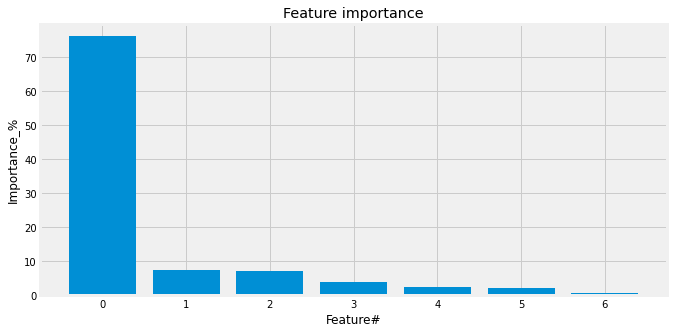

In [54]:
plt.figure(figsize=(10,5))
plt.bar([x for x in range(len(feature_imp))], feature_imp['Imp_%'])
plt.title('Feature importance');
plt.xlabel('Feature#')
plt.ylabel('Importance_%')
plt.show()

In [55]:
rf_model_1.feature_importances_

array([0.03925194, 0.07517097, 0.00668781, 0.02252945, 0.07231617,
       0.0233121 , 0.76073156])

***>>> GRADIENT BOOSTING REGRESSOR BASIC MODEL***

In [56]:
print('GRADIENT BOOSTING REGRESSION\n')
gb_model = GradientBoostingRegressor()
calc_performance(gb_model, X_train1, X_test1)

GRADIENT BOOSTING REGRESSION

Accuracy for train set 			 0.8713717754673085
Accuracy for test set 			 0.8499570064781591

RMSE for train set 			 500.24171643106314
RMSE for test set 			 550.9346342154033

R-Squared for train set 		 0.8713717754673085
R-Squared for test set 			 0.8499570064781591

Adjusted R-Squared for train set 	 0.8710864783913488
Adjusted R-Squared for test set 	 0.849177851467289

MAE for train set 			 391.37434689455233
MAE for test set 			 424.4418085645398

-------------------------------------------------------------------------------------


***>>> KNeighbors Regressor***

In [57]:
rmse_vals = []; kn_scores=[]

for k in np.arange(1,21,2):
    kneighbor_reg_model = KNeighborsRegressor(n_neighbors=k).fit(X_train_scaled1,y_train)
    y_pred_k = kneighbor_reg_model.predict(X_test_scaled1)
    rmse_k = np.sqrt(mean_squared_error(y_test, y_pred_k))
    rmse_vals.append(rmse_k)
    kn_scores.append(kneighbor_reg_model.score(X_test_scaled1,y_test))

In [58]:
mce_scores = [1 - x for x in kn_scores]

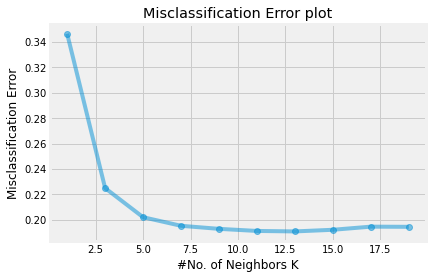

In [59]:
plt.plot(range(1,21,2),mce_scores,marker='o', alpha=0.5);
plt.xlabel('#No. of Neighbors K')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error plot')
plt.show();

In [ ]:
# Trying with k=9

In [60]:
kneighbor_reg_model = KNeighborsRegressor(n_neighbors=9)
kneighbor_reg_model.fit(X_train_scaled1,y_train)
y_pred_k1 = kneighbor_reg_model.predict(X_test_scaled1)
kneighbor_reg_model.score(X_train_scaled1,y_train), kneighbor_reg_model.score(X_test_scaled1,y_test)

(0.8508464517424603, 0.8071489626141376)

In [61]:
print('KNEIGHBOR REGRESSION\n')
kneighbor_reg_model1 = KNeighborsRegressor(n_neighbors=9)
calc_performance(kneighbor_reg_model1, X_train_scaled1, X_test_scaled1)

KNEIGHBOR REGRESSION

Accuracy for train set 			 0.8508464517424603
Accuracy for test set 			 0.8071489626141376

RMSE for train set 			 538.6771614916634
RMSE for test set 			 624.6017612269653

R-Squared for train set 		 0.8508464517424603
R-Squared for test set 			 0.8071489626141376

Adjusted R-Squared for train set 	 0.8505156295505076
Adjusted R-Squared for test set 	 0.8061475106395819

MAE for train set 			 412.2629582806574
MAE for test set 			 471.8693051458538

-------------------------------------------------------------------------------------


**HYPERPARAMETER TUNING**

In [62]:
models = {'Linear Regression':
          {'classifier':LinearRegression(),
           'parameters': {'n_jobs':[None,2,4]
                         }
          },
          
          'Random Forest Regressor':
          {'classifier':RandomForestRegressor(),
           'parameters': {'n_estimators':np.arange(50,500,30),
                          'max_depth': np.arange(5,50,10),
                          'min_samples_split': [10,15,20],
                          'min_samples_leaf': [10,15,20],
                          'oob_score': [True, False],
                          'n_jobs': [2,4,6]
                         }  
          },
          
          'Gradient Boosting Regressor':
          {'classifier':GradientBoostingRegressor(),
           'parameters': {'n_estimators':np.arange(10,150,10),
                          'max_depth': np.arange(5,25,5),
                          'min_samples_split': np.arange(30,110,10),
                          'min_samples_leaf': np.arange(30,110,10),
                          'tol': [0.00000000000001, 0.000000001,0.000001, 0.0001, 0.001, 0.01, 
                                      0.1, 0.2, 0.3]
                         }  
          },
          
          'KNeighborsRegressor':
              {'classifier':KNeighborsRegressor(),
               'parameters': { 'n_neighbors': np.arange(1,21,2),
                               'metric': ['minkowski', 'euclidean'],
                               'n_jobs': [2,4,6]
                             }
              }
          
         }

In [152]:
performance = []

for model, grid in models.items():
    rcv_search = RandomizedSearchCV(estimator=grid['classifier'],
                                    param_distributions=grid['parameters'],
                                    cv=10)
    if model in ['Random Forest Regressor','Gradient Boosting Regressor']:
        rcv_search.fit(X_train1,y_train)
    else:
        rcv_search.fit(X_train_scaled1,y_train)
    
    performance.append({'model': model,
                       'best_params': rcv_search.best_params_,
                       'best_score': rcv_search.best_score_  
                      })

In [153]:
model_df = pd.DataFrame(performance)
model_df

,model,best_params,best_score
0,Linear Regression,{'n_jobs': None},0.804966
1,Random Forest Regressor,"{'oob_score': False, 'n_jobs': 4, 'n_estimator...",0.841364
2,Gradient Boosting Regressor,"{'tol': 0.0001, 'n_estimators': 50, 'min_sampl...",0.850252
3,KNeighborsRegressor,"{'n_neighbors': 11, 'n_jobs': 2, 'metric': 'mi...",0.806941


**BUILDING OPTIMIZED MODELS**

In [159]:
model_df.iloc[3,1]

{'n_neighbors': 11, 'n_jobs': 2, 'metric': 'minkowski'}

In [63]:
lr_model1 = LinearRegression().fit(X_train_scaled1,y_train)

y_pred_lr_train = lr_model1.predict(X_train_scaled1)
y_pred_lr_test = lr_model1.predict(X_test_scaled1)

lr_model1_acc_train = lr_model1.score(X_train_scaled1, y_train)
lr_model1_acc_test = lr_model1.score(X_test_scaled1, y_test)

lr_model1_acc_train, lr_model1_acc_test

(0.8095417890854703, 0.8124321096992956)

In [64]:
rf_model1 = RandomForestRegressor(oob_score=False, n_jobs=4, n_estimators=200,
                                 min_samples_split=20, min_samples_leaf=10,
                                 max_depth=15).fit(X_train1,y_train)

y_pred_rf_train = rf_model1.predict(X_train1)
y_pred_rf_test = rf_model1.predict(X_test1)

rf_model_acc_train = rf_model1.score(X_train1, y_train)
rf_model_acc_test = rf_model1.score(X_test1, y_test)

rf_model_acc_train, rf_model_acc_test

(0.8914671965517468, 0.8469385096505222)

In [65]:
gb_model1 = GradientBoostingRegressor(tol=0.0001, n_estimators=50, min_samples_split=80,
                                     min_samples_leaf=30, max_depth=10)
gb_model1.fit(X_train_scaled1,y_train)

y_pred_gb_train = gb_model1.predict(X_train_scaled1)
y_pred_gb_test = gb_model1.predict(X_test_scaled1)

gb_model_acc_train = gb_model1.score(X_train_scaled1, y_train)
gb_model_acc_test = gb_model1.score(X_test_scaled1, y_test)

gb_model_acc_train, gb_model_acc_test

(0.9066852799961662, 0.8575133083631578)

In [66]:
kn_reg_model = KNeighborsRegressor(n_neighbors=11, metric='minkowski', n_jobs=2).fit(X_train_scaled1,y_train)

y_pred_kn_train = kn_reg_model.predict(X_train_scaled1)
y_pred_kn_test = kn_reg_model.predict(X_test_scaled1)

kn_reg_acc_train = kn_reg_model.score(X_train_scaled1,y_train)
kn_reg_acc_test = kn_reg_model.score(X_test_scaled1,y_test)

kn_reg_acc_train, kn_reg_acc_test

(0.844585505392202, 0.808804451851579)

In [ ]:
#(0.6509902985675992, 0.6281404492455882)

**PERFORMANCE  METRICS**

In [67]:
models = ['Linear_Regression', 'RF_Regressor', 'GB_Regressor', 'KNeighbors_Regressor']
#n = X_test1.shape[0]
#k = X_test1.shape[1]

In [70]:
def calculate_metrics(X_set, models, actual, pred_set):
    
    r2_scores = []; mae_scores = []; adj_r2_scores = []; rmse_scores = []
    
    n = X_set.shape[0]
    k = X_set.shape[1]
    
    for model, pred in zip(models, pred_set):
        r2_score_model = r2_score(actual, pred)
        r2_scores.append(r2_score_model)

        adj_r2_score = 1 - (((1-r2_score_model)*(n-1))/(n-k-1))
        adj_r2_scores.append(adj_r2_score)
        
        rmse_scores.append(np.sqrt(mean_squared_error(actual, pred)))

        mae_scores.append(mean_absolute_error(actual, pred))
        
    return r2_scores, adj_r2_scores, rmse_scores, mae_scores

***>>> Train set performance***

In [71]:
pred_train = [y_pred_lr_train, y_pred_rf_train, y_pred_gb_train, y_pred_kn_train]

r2_train, adj_r2_train, rmse_train, mae_train = calculate_metrics(X_train1, models, y_train, pred_train)

***>>> Test set performance***

In [72]:
pred_test = [y_pred_lr_test, y_pred_rf_test, y_pred_gb_test, y_pred_kn_test]

r2_test, adj_r2_test, rmse_test, mae_test = calculate_metrics(X_test1, models, y_test, pred_test)

***>>> Model Comparison***

In [77]:
model_perf = pd.DataFrame({'Model': models,
                           'R2_train': np.round([i*100 for i in r2_train],2),
                           'R2_test': np.round([i*100 for i in r2_test],2),
                           'Adj_R2_train':np.round([i*100 for i in adj_r2_train],2),
                           'Adj_R2_test':np.round([i*100 for i in adj_r2_test],2),
                           'RMSE_train': np.round([i for i in rmse_train],2),
                           'RMSE_test': np.round([i for i in rmse_test],2),
                           'MAE_train': np.round([i for i in mae_train],2),
                           'MAE_test': np.round([i for i in mae_test],2)
                         })
model_perf

,Model,R2_train,R2_test,Adj_R2_train,Adj_R2_test,RMSE_train,RMSE_test,MAE_train,MAE_test
0,Linear_Regression,80.95,81.24,80.91,81.15,608.71,615.99,485.56,487.01
1,RF_Regressor,89.15,84.69,89.12,84.61,459.51,556.45,351.81,427.97
2,GB_Regressor,90.67,85.75,90.65,85.68,426.08,536.88,325.64,406.02
3,KNeighbors_Regressor,84.46,80.88,84.42,80.78,549.87,621.92,420.37,469.80


In [79]:
model_perf.set_index('Model',inplace=True)
model_perf.T

Model,Linear_Regression,RF_Regressor,GB_Regressor,KNeighbors_Regressor
R2_train,80.95,89.15,90.67,84.46
R2_test,81.24,84.69,85.75,80.88
Adj_R2_train,80.91,89.12,90.65,84.42
Adj_R2_test,81.15,84.61,85.68,80.78
RMSE_train,608.71,459.51,426.08,549.87
RMSE_test,615.99,556.45,536.88,621.92
MAE_train,485.56,351.81,325.64,420.37
MAE_test,487.01,427.97,406.02,469.80


**GRADIENT BOOSTING OPTIMIZATION**

***>>> RFE for Gradient Boosting Regressor***

In [81]:
for i in range(5,20):
    rfe_2 = RFE(estimator=GradientBoostingRegressor(), n_features_to_select=i, step=1)
    rfe_2.fit(X_train,y_train)
    predictors = X.columns[rfe_2.get_support()].values
    find_best_Adj_R2(predictors, GradientBoostingRegressor())

NO. OF PREDICTORS:	 5

Accuracy for train set 			 0.8655184819299925
Accuracy for test set 			 0.8474510208563011

RMSE for train set 			 511.49697513634095
RMSE for test set 			 555.5163781546258

Adjusted R-Squared for train set 	 0.865305559957114
Adjusted R-Squared for test set 	 0.8468860246372504

------------------------------------------------------------------------------------------------------------
NO. OF PREDICTORS:	 6

Accuracy for train set 			 0.8718188014628223
Accuracy for test set 			 0.8502312785894716

RMSE for train set 			 499.371706447313
RMSE for test set 			 550.4308615340816

Adjusted R-Squared for train set 	 0.8715751881618331
Adjusted R-Squared for test set 	 0.8495651463963929

------------------------------------------------------------------------------------------------------------
NO. OF PREDICTORS:	 7

Accuracy for train set 			 0.8727361988582002
Accuracy for test set 			 0.8489441080899878

RMSE for train set 			 497.58148700032626
RMSE for test se

In [82]:
best_predictors_df1 = pd.DataFrame(best_predictors).sort_values(['Adj_R2_Test'], ascending= False).reset_index().drop('index',axis=1)
best_predictors_df1.head()

,No_#,Predictors,Acc_Train,Acc_Test,RMSE_Train,RMSE_Test,Adj_R2_Train,Adj_R2_Test
0,6,"[Age, CustTenure, Designation, MonthlyIncome, ...",0.871819,0.850231,499.371706,550.430862,0.871575,0.849565
1,11,"[Age, CustTenure, EducationField, ExistingProd...",0.874084,0.850018,494.939603,550.823099,0.873645,0.848790
2,10,"[Age, CustTenure, EducationField, ExistingProd...",0.873236,0.849447,496.604140,551.869533,0.872834,0.848328
3,7,"[Age, CustTenure, Designation, MonthlyIncome, ...",0.872736,0.848944,497.581487,552.791109,0.872454,0.848160
4,12,"[Age, CustTenure, EducationField, ExistingProd...",0.874629,0.849340,493.866409,552.066562,0.874152,0.847994


In [83]:
best_predictors_df.iloc[0,1]

array(['Age', 'CustTenure', 'EducationField', 'Designation',
       'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured'],
      dtype=object)

In [84]:
best_predictors_df1.iloc[0,1]

array(['Age', 'CustTenure', 'Designation', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured'], dtype=object)

In [85]:
best_features1 = best_predictors_df1.iloc[0,1]
#best_features1 = best_predictors_df2.iloc[2,1]

In [86]:
X_train2 = X_train[best_features1]
X_test2 = X_test[best_features1]

X_train_scaled2 = X_train_scaled[best_features1]
X_test_scaled2 = X_test_scaled[best_features1]

***>>> Hyperparameter Tuning for Gradient Boosting Regressor***

In [90]:
models_1 = {'Gradient Boosting Regressor':
              {'classifier':GradientBoostingRegressor(),
               'parameters': {'n_estimators':np.arange(10,150,10),
                              'max_depth': np.arange(5,25,5),
                              'min_samples_split': np.arange(30,110,10),
                              'min_samples_leaf': np.arange(30,110,10),
                              'tol': [0.00000000000001, 0.000000001,0.000001, 0.0001, 0.001, 0.01, 
                                      0.1, 0.2, 0.3],
                         }  
              }
         }

In [91]:
performance1 = []

for model, grid in models_1.items():
    for i in range(10):
        rcv_search1 = RandomizedSearchCV(estimator = grid['classifier'],
                                         param_distributions = grid['parameters'],
                                         cv=15)
        rcv_search1.fit(X_train2,y_train)

        performance1.append({'model': model,
                             'best_params': rcv_search1.best_params_,
                             'best_score': rcv_search1.best_score_  
                          })
    
model_df1 = pd.DataFrame(performance1)
model_df1.head()

,model,best_params,best_score
0,Gradient Boosting Regressor,"{'tol': 1e-09, 'n_estimators': 90, 'min_sample...",0.841415
1,Gradient Boosting Regressor,"{'tol': 0.001, 'n_estimators': 40, 'min_sample...",0.846108
2,Gradient Boosting Regressor,"{'tol': 1e-14, 'n_estimators': 70, 'min_sample...",0.843772
3,Gradient Boosting Regressor,"{'tol': 0.0001, 'n_estimators': 100, 'min_samp...",0.846186
4,Gradient Boosting Regressor,"{'tol': 0.01, 'n_estimators': 60, 'min_samples...",0.845234


In [92]:
model_df1.sort_values('best_score',ascending=False).head(3)

,model,best_params,best_score
7,Gradient Boosting Regressor,"{'tol': 0.3, 'n_estimators': 40, 'min_samples_...",0.846691
6,Gradient Boosting Regressor,"{'tol': 0.001, 'n_estimators': 90, 'min_sample...",0.846450
3,Gradient Boosting Regressor,"{'tol': 0.0001, 'n_estimators': 100, 'min_samp...",0.846186


In [93]:
for i in range(10):
    params = list(model_df1.iloc[i,1].values())
    gb_1 = GradientBoostingRegressor(tol=params[0], n_estimators=params[1], min_samples_split=params[2],
                                         min_samples_leaf=params[3], max_depth=params[4]) 
    print(i,'set of params:************\n')
    calc_performance(gb_1, X_train2, X_test2)
    print('\n---------------------------------------------------------------------------------------')

0 set of params:************

Accuracy for train set 			 0.8959176754255311
Accuracy for test set 			 0.8486707041330641

RMSE for train set 			 449.98730315164073
RMSE for test set 			 553.2911459608023

R-Squared for train set 		 0.8959176754255311
R-Squared for test set 			 0.8486707041330641

Adjusted R-Squared for train set 	 0.8957198629619749
Adjusted R-Squared for test set 	 0.8479976309120103

MAE for train set 			 346.39560095520966
MAE for test set 			 423.7923275651619

-------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------
1 set of params:************

Accuracy for train set 			 0.8942911187232605
Accuracy for test set 			 0.8517045589456791

RMSE for train set 			 453.489782649275
RMSE for test set 			 547.7168664257963

R-Squared for train set 		 0.8942911187232605
R-Squared for test set 			 0.8517045589456791

Adjusted R-Squared for train set 	 0.89409

In [177]:
model_df1.to_excel('GB_params_v00.xlsx')

In [178]:
model_df1.iloc[15,1]

{'tol': 1e-06,
 'n_estimators': 100,
 'min_samples_split': 70,
 'min_samples_leaf': 60,
 'max_depth': 5}

In [180]:
gb_model_1 = GradientBoostingRegressor(tol=1e-06, n_estimators=100, min_samples_split=70,
                                min_samples_leaf=60, max_depth=5)
#gb_model_1 = gb_model_1.fit(X_train2, y_train)
calc_performance(gb_model_1, X_train2, X_test2) 

Accuracy for train set 			 0.8788024137871756
Accuracy for test set 			 0.8528171031501909

RMSE for train set 			 485.577722167338
RMSE for test set 			 545.6584537925057

R-Squared for train set 		 0.8788024137871756
R-Squared for test set 			 0.8528171031501909

Adjusted R-Squared for train set 	 0.8785720731101794
Adjusted R-Squared for test set 	 0.8521624720300287

MAE for train set 			 377.9414307991577
MAE for test set 			 418.1773005268979

-------------------------------------------------------------------------------------


In [181]:
np.round((0.8785720731101794-0.8521624720300287)*100,2)

2.64

In [182]:
gb_feature_imp = pd.DataFrame({'Variables':X_test2.columns,'Imp_%':(gb_model_1.feature_importances_)*100}).sort_values('Imp_%',ascending=False).reset_index().drop('index',axis=1)
gb_feature_imp

,Variables,Imp_%
0,SumAssured,80.147064
1,CustTenure,5.923741
2,Designation,4.673304
3,Age,4.199712
4,MonthlyIncome,3.995276
5,ExistingPolicyTenure,1.060903


In [94]:
#OPTIMIZING MORE
gb_model_2 = GradientBoostingRegressor(tol=0.0001, n_estimators=50, min_samples_split=30,
                                min_samples_leaf=30, max_depth=5)
calc_performance(gb_model_2, X_train2, X_test2) 

Accuracy for train set 			 0.8775293059454736
Accuracy for test set 			 0.8544661349725267

RMSE for train set 			 488.1214107841303
RMSE for test set 			 542.5930747748661

R-Squared for train set 		 0.8775293059454736
R-Squared for test set 			 0.8544661349725267

Adjusted R-Squared for train set 	 0.8772965456780276
Adjusted R-Squared for test set 	 0.8538188383156217

MAE for train set 			 379.06324665659423
MAE for test set 			 416.7159131059509

-------------------------------------------------------------------------------------


In [89]:
np.round((0.8772965456780276-0.8538188383156217)*100,2), 416.71-379.06

(2.35, 37.64999999999998)

***>>> GB Model Feature Importance***

In [95]:
gb_feature_imp2 = pd.DataFrame({'Variables':X_test2.columns,'Imp_%':(gb_model_2.feature_importances_)*100}).sort_values('Imp_%',ascending=False).reset_index().drop('index',axis=1)
gb_feature_imp2

,Variables,Imp_%
0,SumAssured,80.963942
1,CustTenure,5.843698
2,MonthlyIncome,4.869521
3,Designation,3.606661
4,Age,3.559866
5,ExistingPolicyTenure,1.156312


***>>> Making Predictions***

In [96]:
gb_pred_train = gb_model_2.predict(X_train2)
gb_pred_test = gb_model_2.predict(X_test2)

gb_model_2.score(X_train2,y_train), gb_model_2.score(X_test2,y_test)

(0.8775293059454736, 0.8544661349725267)

In [97]:
gb_pred_test

array([4457.79128062, 3769.81045298, 4971.98516142, ..., 3472.70669508,
       3708.13048256, 3267.01529305])

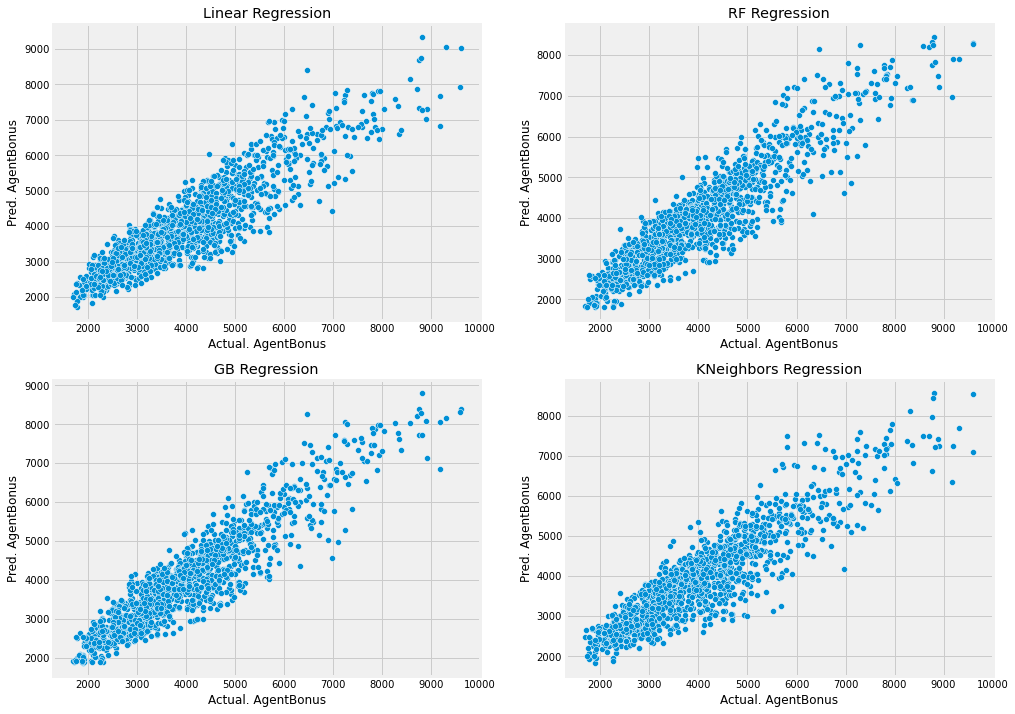

In [98]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,12

fig, axes = plt.subplots(nrows=2,ncols=2)

a1 = sns.scatterplot(x=y_test, y = y_pred_lr_test, ax=axes[0][0])
a1.set_title('Linear Regression')
a1.set_xlabel('Actual. AgentBonus')
a1.set_ylabel('Pred. AgentBonus')

a2 = sns.scatterplot(x=y_test, y = y_pred_rf_test, ax=axes[0][1])
a2.set_title('RF Regression')
a2.set_xlabel('Actual. AgentBonus')
a2.set_ylabel('Pred. AgentBonus')

a3 = sns.scatterplot(x=y_test, y = gb_pred_test, ax=axes[1][0])
a3.set_title('GB Regression')
a3.set_xlabel('Actual. AgentBonus')
a3.set_ylabel('Pred. AgentBonus')

a4 = sns.scatterplot(x=y_test, y = y_pred_kn_test, ax=axes[1][1])
a4.set_title('KNeighbors Regression');
a4.set_xlabel('Actual. AgentBonus')
a4.set_ylabel('Pred. AgentBonus')

plt.show()

**SETTING BENCHMARK FOR HIGH-PERFORMING AGENTS**

In [99]:
gb_pred_test.min(),gb_pred_test.max()

(1868.498858371658, 8799.923812306677)

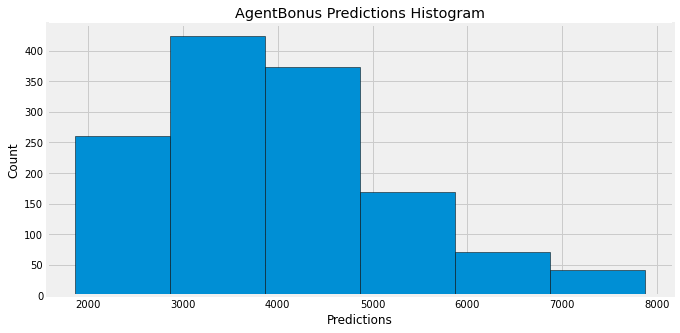

In [100]:
plt.figure(figsize=(10,5))
bins = np.arange(gb_pred_test.min(),gb_pred_test.max(),1000)
plt.hist(gb_pred_test, bins=bins, edgecolor='black');
plt.title('AgentBonus Predictions Histogram');
plt.xlabel('Predictions')
plt.ylabel('Count');
#plt.hist(gb_pred_test, edgecolor='black');

In [101]:
bins

array([1868.49885837, 2868.49885837, 3868.49885837, 4868.49885837,
       5868.49885837, 6868.49885837, 7868.49885837])

In [102]:
len(gb_pred_test),

(1356,)

In [103]:
gb_df = pd.DataFrame({'Predictions':gb_pred_test})
gb_df.head()

,Predictions
0,4457.791281
1,3769.810453
2,4971.985161
3,2808.209236
4,4074.678887


In [104]:
gb_df[gb_df.Predictions>=4868.49885837].shape[0]

299

In [105]:
print('{}% of the agents are highly-skilled'.format(round((299/1356)*100,2)))

22.05% of the agents are highly-skilled


**ANALYSIS OF PREDICTIONS**

In [106]:
X_test_rev = pd.DataFrame(sc.inverse_transform(X_test_scaled),columns=X_test_scaled.columns)
X_test_rev = X_test_rev[best_features1]
X_test_rev.head()

,Age,CustTenure,Designation,MonthlyIncome,ExistingPolicyTenure,SumAssured
0,23.0,8.0,0.0,21436.0,10.0,733111.0
1,23.0,9.0,1.0,19724.0,3.0,574363.0
2,23.0,18.0,0.0,21834.0,9.0,880347.0
3,21.0,11.0,1.0,24039.0,6.0,371403.0
4,21.0,21.0,0.0,21057.0,5.0,661190.0


In [107]:
pred_df = X_test_rev.copy()
pred_df['Pred_AgentBonus'] = [np.round(bonus,2) for bonus in gb_df.Predictions]
pred_df.head()

,Age,CustTenure,Designation,MonthlyIncome,ExistingPolicyTenure,SumAssured,Pred_AgentBonus
0,23.0,8.0,0.0,21436.0,10.0,733111.0,4457.79
1,23.0,9.0,1.0,19724.0,3.0,574363.0,3769.81
2,23.0,18.0,0.0,21834.0,9.0,880347.0,4971.99
3,21.0,11.0,1.0,24039.0,6.0,371403.0,2808.21
4,21.0,21.0,0.0,21057.0,5.0,661190.0,4074.68


In [108]:
pred_df['Performance'] = np.where(pred_df['Pred_AgentBonus']>=4868.50,
                                          'High-Performing',
                                          'Low-Performing')
pred_df.head()

,Age,CustTenure,Designation,MonthlyIncome,ExistingPolicyTenure,SumAssured,Pred_AgentBonus,Performance
0,23.0,8.0,0.0,21436.0,10.0,733111.0,4457.79,Low-Performing
1,23.0,9.0,1.0,19724.0,3.0,574363.0,3769.81,Low-Performing
2,23.0,18.0,0.0,21834.0,9.0,880347.0,4971.99,High-Performing
3,21.0,11.0,1.0,24039.0,6.0,371403.0,2808.21,Low-Performing
4,21.0,21.0,0.0,21057.0,5.0,661190.0,4074.68,Low-Performing


In [111]:
pred_df.Performance.value_counts(normalize=True)

Low-Performing     0.779499
High-Performing    0.220501
Name: Performance, dtype: float64

In [112]:
pred_df.Performance.value_counts()

Low-Performing     1057
High-Performing     299
Name: Performance, dtype: int64

In [109]:
pd.DataFrame(pred_df.groupby(['Performance'])['Pred_AgentBonus'].mean())

,Pred_AgentBonus
Performance,
High-Performing,5993.182007
Low-Performing,3510.455658


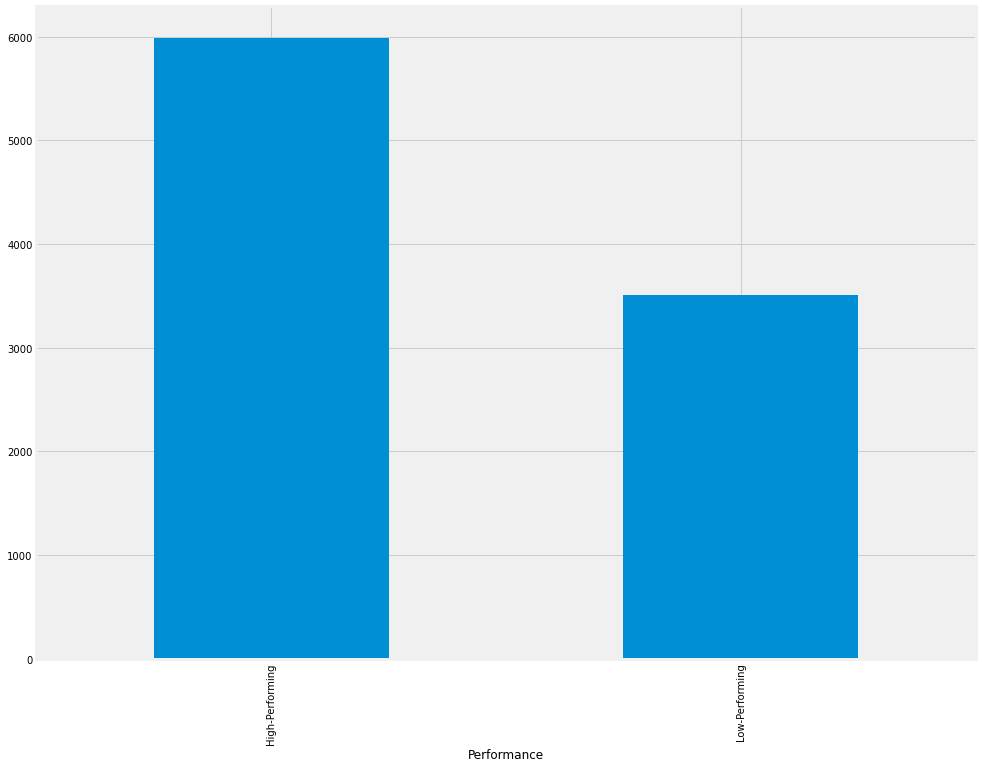

In [110]:
pred_df.groupby(['Performance'])['Pred_AgentBonus'].mean().plot(kind='bar');

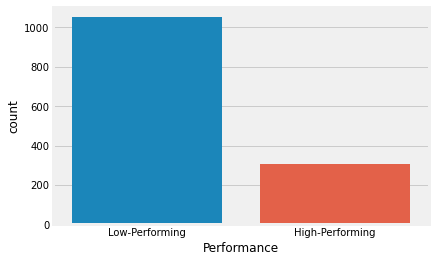

In [86]:
sns.countplot(pred_df.Performance);